<a href="https://colab.research.google.com/github/Nyawira12/Hypothyroid-Disease-Prediction/blob/main/Hypothyroidism_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION FOR HYPOTHYROID DISEASE**

# 1. Defining the Question

## a) Specifying the Question

Nairobi Hospital carried out a clinical camp to test for hypothyroidsm. You are required to design a model that will predict whether or not a pateint has hypothyroidism based on data collected from thyroid patients. The design will apply the following techniques:
- Decision Trees
- SVM 


## b) Defining Success Metrics

The success metrics of thsi project will be defined by the following:
- The accuracy score
- RMSE score

Essentially, the performance of the model in predicting the status of a patient is the mark of success. 



## c) Understanding the Context

Hypothyrodism is the result of a defeciency in thyroid prediction and manifests in symptoms such as fatigue, increased sensitivity to cold, constipation, dry skin, weight gain, muscle weakness and slowed heart rate. If left untreated, it can lead to a number of complications like obesity, joint pain, infertility and cardiac complications. Given its prevalence to certain demographics, it is necessary to predict whether one can plausibly predict whether or not a person has the affliction.



## d) Experimental Design

The process followed in building the prediction models is outlined in the steps below. 

- Importing Libraries and reading dataset
- Exploring the data and making necessary adjustemnts
- Exploratory data analysis
- Implementing the solution
- Challenging the solution
- Conclusion 

# 2. Importing Libraries & Dataset Reading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_style()

In [ ]:
Dataset = pd.read_csv("hypothyroid.csv")
Dataset.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [ ]:
Dataset.tail()

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[5 rows x 26 columns]

# 3. Checking & Cleaning the Dataset

In [ ]:
Dataset.shape

print("There are {} observations and {} features".format(Dataset.shape[0], Dataset.shape[1]))

There are 3163 observations and 26 features


In [ ]:
Dataset.columns.values.tolist()

['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [ ]:
Dataset.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
for i in Dataset.columns:
  x=Dataset[i].value_counts()
  print("The column is:",i,"whose value is:",x)
  print()

The column is: status whose value is: negative       3012
hypothyroid     151
Name: status, dtype: int64

The column is: age whose value is: ?     446
60     64
59     64
62     63
28     60
     ... 
93      1
7       1
90      1
4       1
5       1
Name: age, Length: 93, dtype: int64

The column is: sex whose value is: F    2182
M     908
?      73
Name: sex, dtype: int64

The column is: on_thyroxine whose value is: f    2702
t     461
Name: on_thyroxine, dtype: int64

The column is: query_on_thyroxine whose value is: f    3108
t      55
Name: query_on_thyroxine, dtype: int64

The column is: on_antithyroid_medication whose value is: f    3121
t      42
Name: on_antithyroid_medication, dtype: int64

The column is: thyroid_surgery whose value is: f    3059
t     104
Name: thyroid_surgery, dtype: int64

The column is: query_hypothyroid whose value is: f    2922
t     241
Name: query_hypothyroid, dtype: int64

The column is: query_hyperthyroid whose value is: f    2920
t     243
Name: qu

In [ ]:
Dataset.replace('?', np.nan, inplace=True)
Dataset.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
cat_columns = ['status' ,	'on_thyroxine' ,	'query_on_thyroxine' ,	'on_antithyroid_medication'	, 'thyroid_surgery' ,	'query_hypothyroid' ,	'query_hyperthyroid' , 'pregnant' ,	'sick' ,	'tumor' ,	'lithium' ,	'goitre' ,	'TSH_measured' , 'T3_measured' , 'TT4_measured' ,	'T4U_measured' , 'FTI_measured',	'TBG_measured']

for column in cat_columns:
  Dataset[column] = Dataset[column].astype('str')


In [ ]:
num_columns = ['age' , 'TSH' , 'T3' , 'TT4' , 'T4U' , 'FTI']

for column in num_columns:
  Dataset[column] = Dataset[column].astype('float')

In [ ]:
Dataset['sex'] = Dataset['sex'].astype('category')
Dataset['sex'] = Dataset['sex'].cat.codes

In [ ]:
def fillmissing(dataframe_name, column_name,approach):
    if approach == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
    elif approach=='median':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))
    elif approach=='mode':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))

In [ ]:
fillmissing(Dataset,'T3','median') 
fillmissing(Dataset,'TSH','median')
fillmissing(Dataset,'age','mean') 
fillmissing(Dataset,'TT4','median')
fillmissing(Dataset,'T4U','median')
fillmissing(Dataset,'FTI','median')
fillmissing(Dataset,'sex','mode')

In [ ]:
Thyroid_df = Dataset.drop('TBG', axis = 1)
Thyroid_df.head()

status   age  sex on_thyroxine  ...   T4U FTI_measured   FTI TBG_measured
0  hypothyroid  72.0    1            f  ...  1.48            y  10.0            n
1  hypothyroid  15.0    0            t  ...  1.13            y  17.0            n
2  hypothyroid  24.0    1            f  ...  1.00            y   0.0            n
3  hypothyroid  24.0    0            f  ...  1.04            y   6.0            n
4  hypothyroid  77.0    1            f  ...  1.28            y  44.0            n

[5 rows x 25 columns]

After we deal with the null values and for further examination, we shall change the data types to formats that are easy to work with. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Dataset[cat_columns] = Dataset[cat_columns].apply(lambda col:le.fit_transform(col))

In [ ]:
Dataset.drop('TBG', axis=1, inplace=True)

In [ ]:
Dataset.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

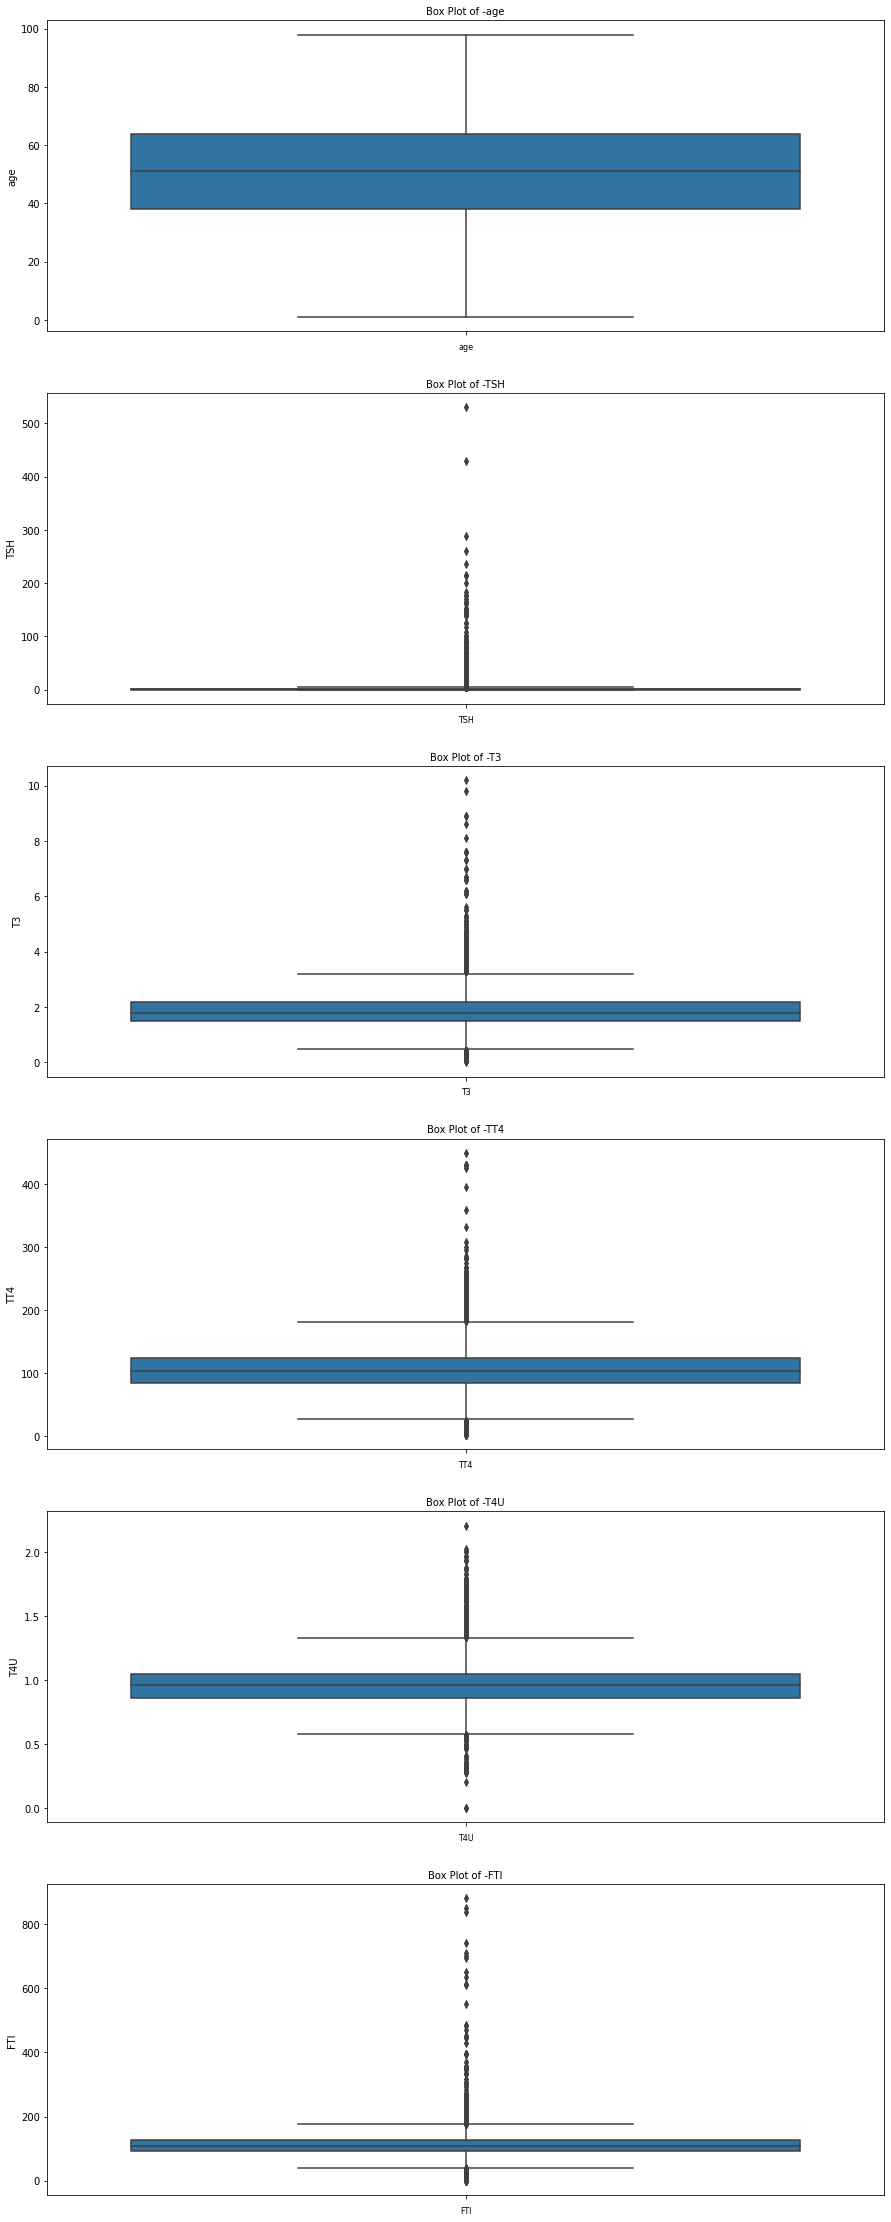

In [ ]:
columns = ['age' , 'TSH' , 'T3' , 'TT4' , 'T4U' , 'FTI']

fig, ax = plt.subplots(len(columns), figsize= (15, 40))

for i, col_val in enumerate(columns):

  sns.boxplot(y = Dataset[col_val], ax=ax[i])
  ax[i].set_title('Box Plot of -{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
Dataset.duplicated().sum()

152

There are no null values and a relatively low number of duplicates whose inclusion in the final dataset for analysis is acceptable. We then proceeded to check for outliers, which seem to be informative and therefore necessary for the analysis. 

# 4. Exploratory Data Analysis

## a) Univariate Analysis

In [ ]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [ ]:
import pandas_profiling as pp 
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(Thyroid_df, title="Data Report")

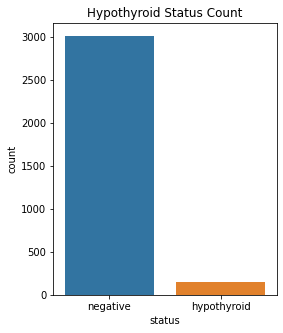

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(Thyroid_df.status, order = Thyroid_df.status.value_counts().index)
plt.title("Hypothyroid Status Count")
plt.show()

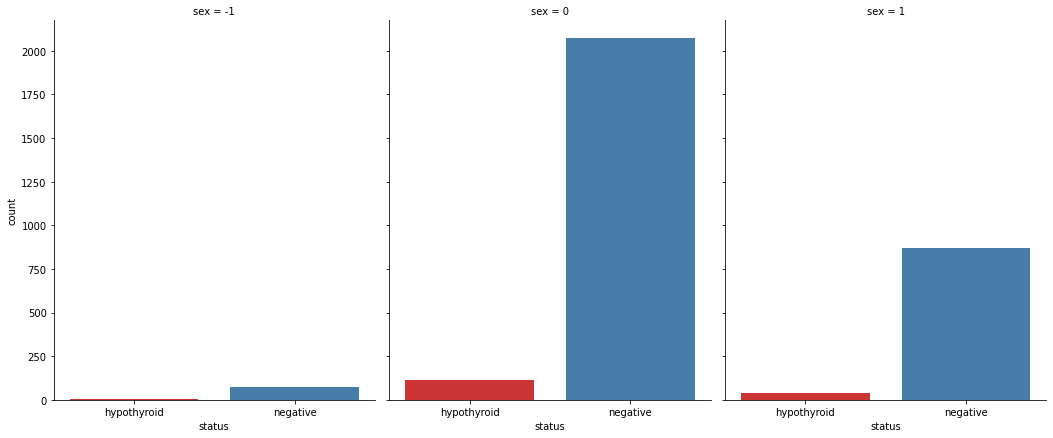

In [ ]:
sns.catplot("status", col="sex", col_wrap=4, data=Thyroid_df, kind="count", height=6, aspect=.8, palette="Set1")

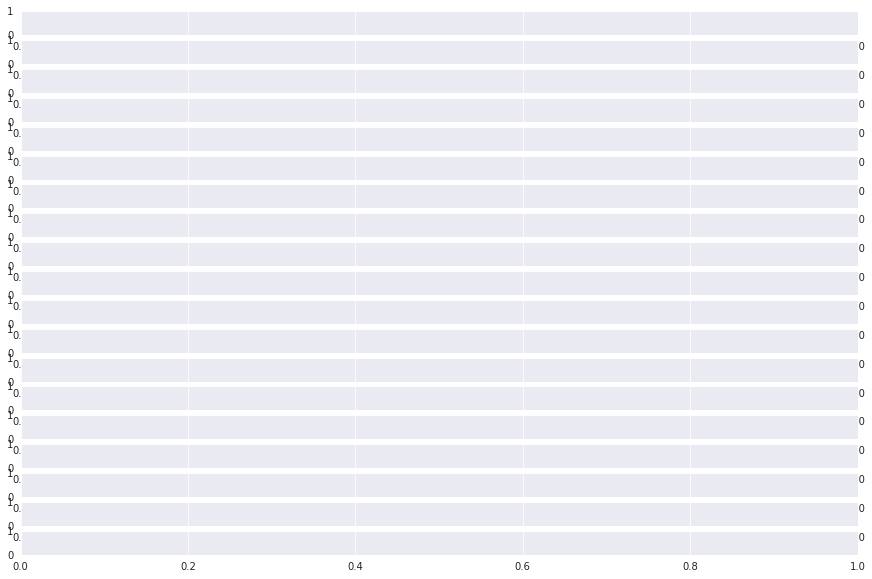

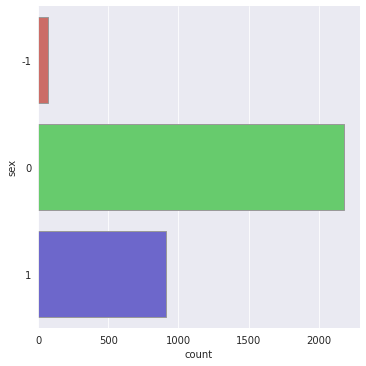

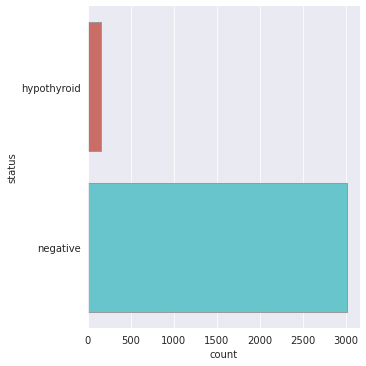

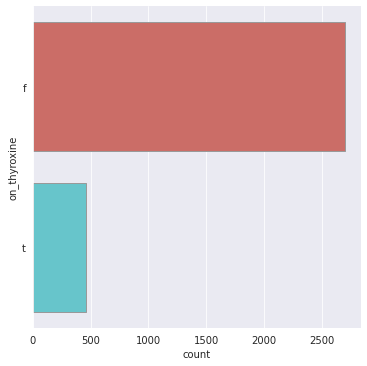

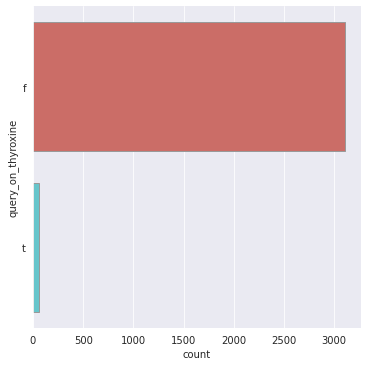

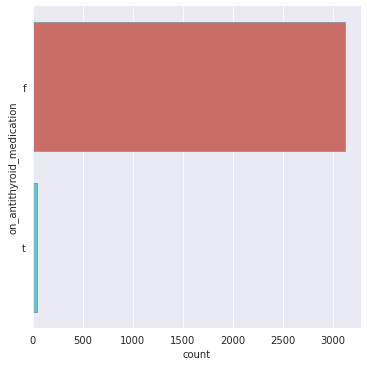

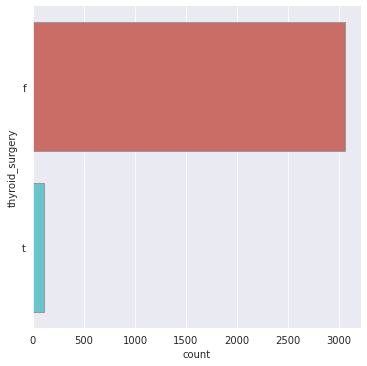

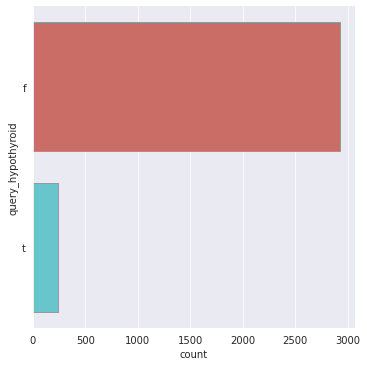

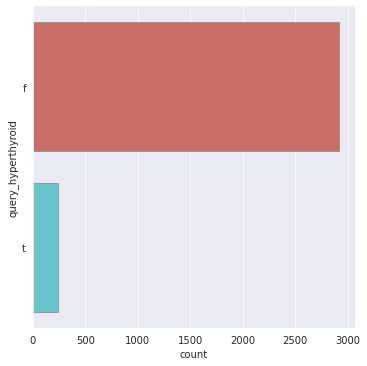

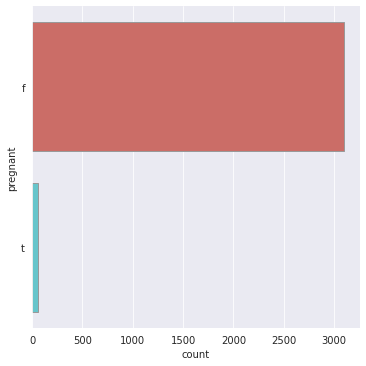

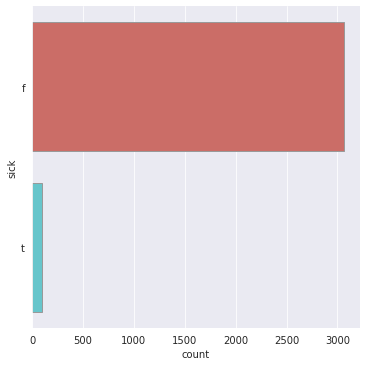

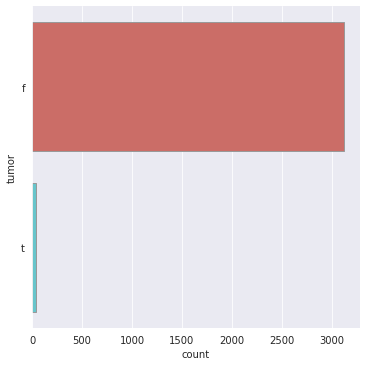

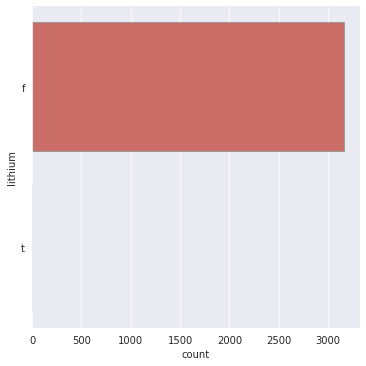

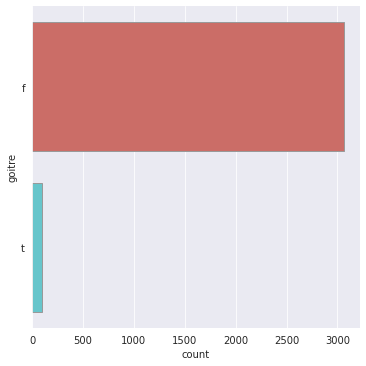

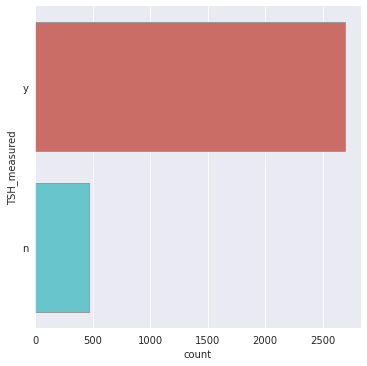

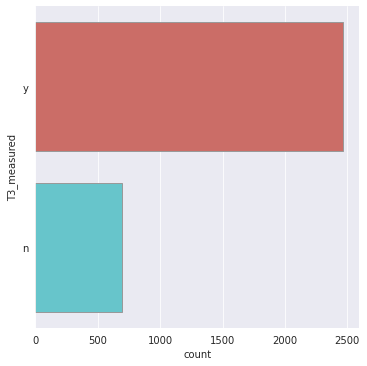

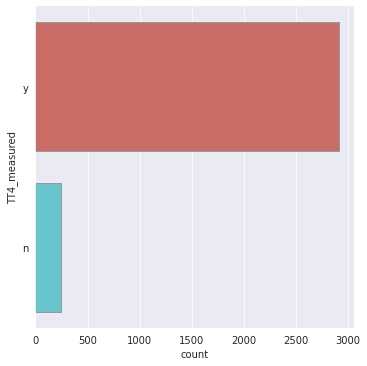

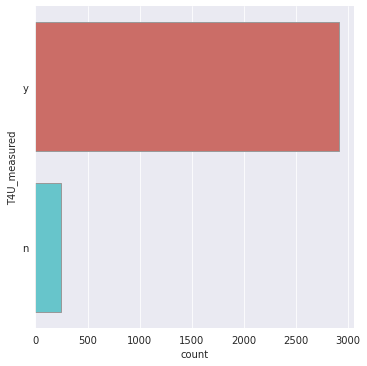

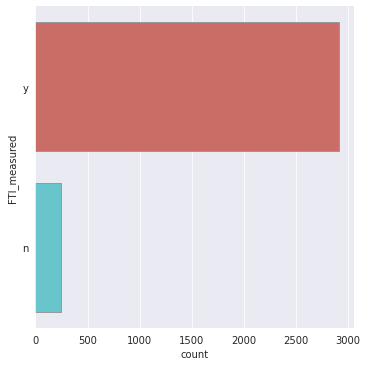

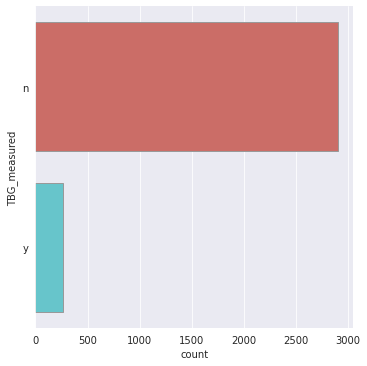

In [ ]:
categorical_columns = ['sex', 'status','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery', 
              'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre',
              'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'] 

sns.set_style("darkgrid")

fig, axes = plt.subplots(len(categorical_columns), figsize=(15, 10))

for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", palette="hls", edgecolor=".6", data=Thyroid_df, ax=subplot);

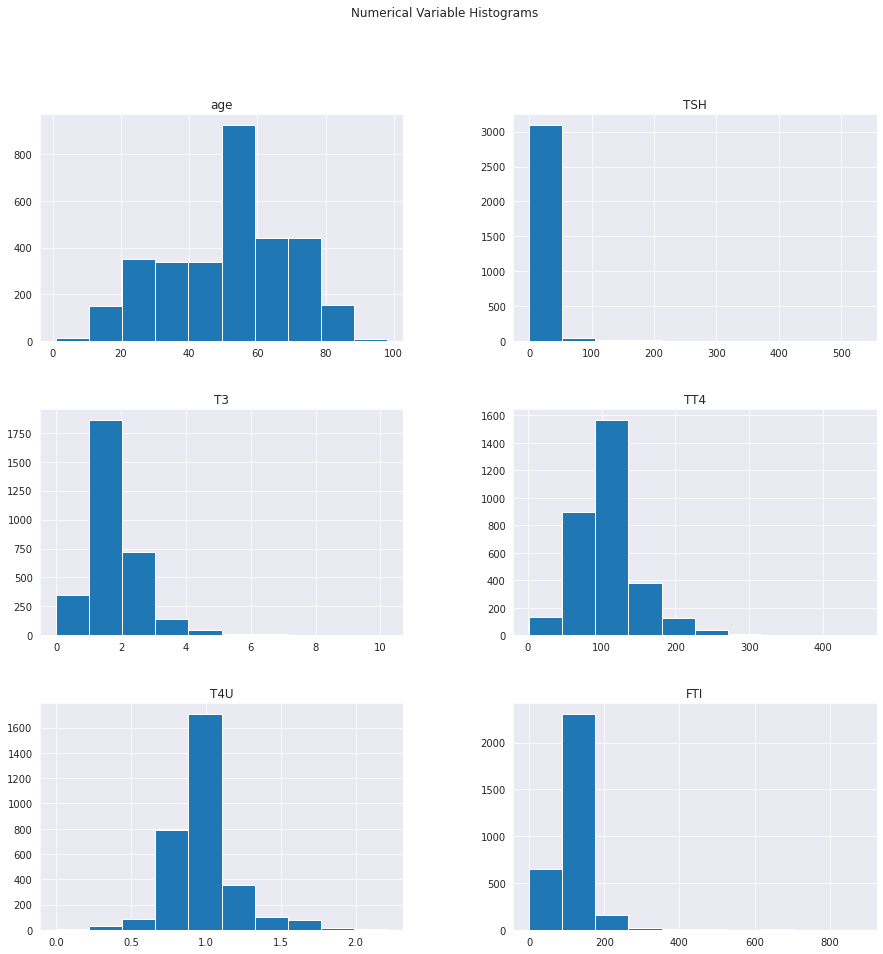

In [ ]:
numerical_columns = Dataset[['age' , 'TSH' , 'T3' , 'TT4' , 'T4U' , 'FTI']]

numerical_columns.hist(bins=10, figsize=(15,15))
plt.suptitle("Numerical Variable Histograms")
plt.show()

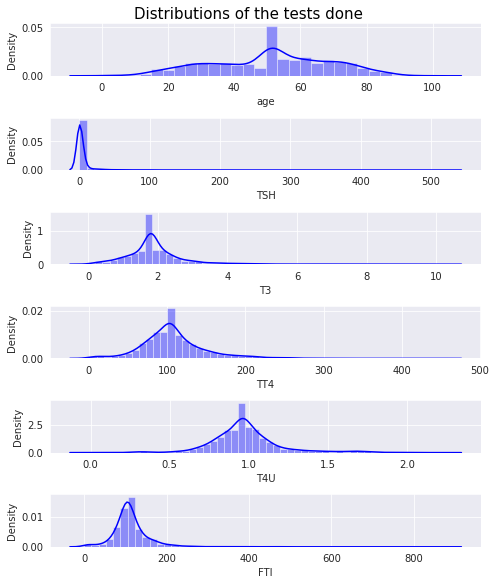

In [ ]:
columns = ['age', 'TSH','T3','TT4','T4U','FTI']
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of the tests done', y= 1.01, color = 'black', fontsize = 15)

for ax, data, col in zip(axes.flatten(), Dataset, columns):
  sns.distplot(Dataset[col], ax = ax, kde = True, color = 'blue')
plt.tight_layout()

The univariate analysis revealed that most of the people tested for the disease were women, with most in both genders testing negative. It also reveals the following on other variables:

- on_thyroxine,query_on_thyroxine false.

- on_antithyroid_medication and thyroid_surgery and pregnancy most patients reported false.

- sick, tumor, lithium, goitre - most patients did not have these conditions. 

- TSH_measured,TSH, most patients TSH levels were measured.Most had low levels. 

- T3, most patients T3 levels were measured and averaged around 3. 

- TT4, most patients TT4 levels were measured.

- T4U, most patients T4U levels were measured.

- FTI, most patients FTI levels were measured.

- TBG, most patients TBG levels were not measured.

- Numerical variables seemed to be normally distributed.

## b) Bivariate Analysis

In [ ]:
Thyroid_df.corr()

age       sex       TSH        T3       TT4       T4U       FTI
age  1.000000  0.014628  0.009475 -0.256469 -0.087354 -0.191816  0.020302
sex  0.014628  1.000000 -0.027592 -0.080427 -0.174627 -0.123162 -0.184920
TSH  0.009475 -0.027592  1.000000 -0.170456 -0.308260  0.070839 -0.243889
T3  -0.256469 -0.080427 -0.170456  1.000000  0.540571  0.386435  0.291282
TT4 -0.087354 -0.174627 -0.308260  0.540571  1.000000  0.323242  0.685251
T4U -0.191816 -0.123162  0.070839  0.386435  0.323242  1.000000 -0.282071
FTI  0.020302 -0.184920 -0.243889  0.291282  0.685251 -0.282071  1.000000

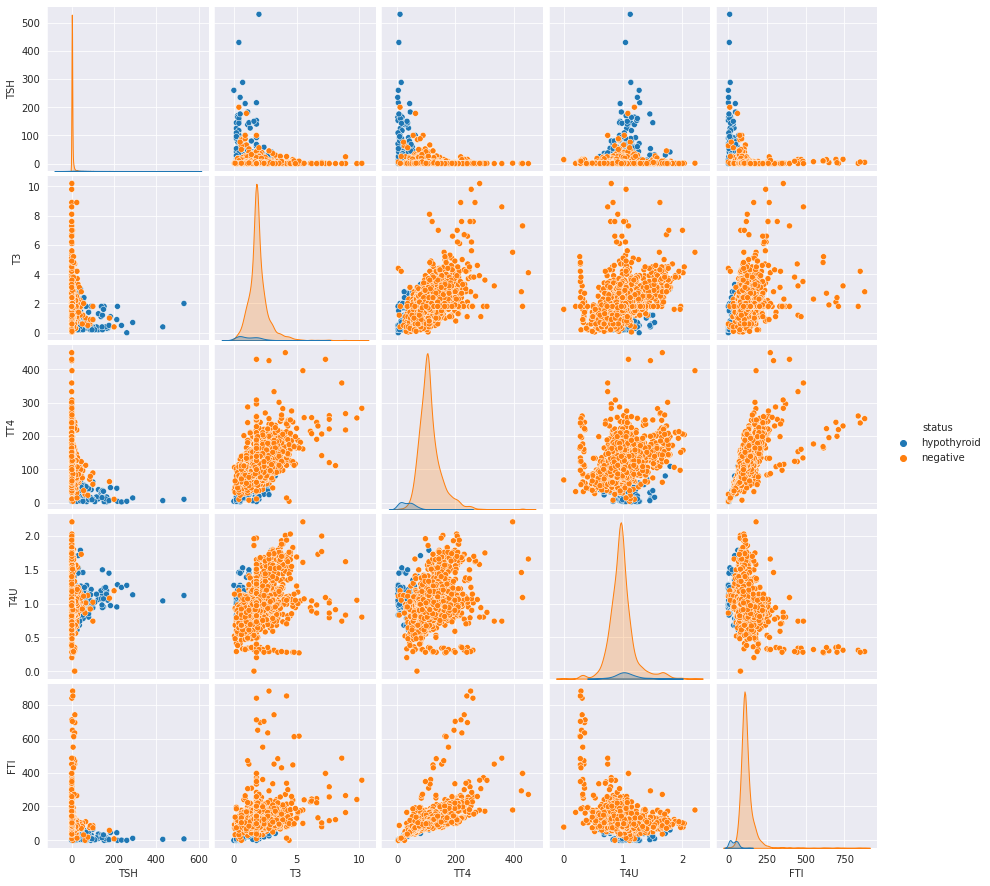

In [ ]:
numerical_df = Thyroid_df.drop(['sex','age','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                                 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
                                 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'],
                                 axis = 1)
sns.pairplot(numerical_df, hue="status")

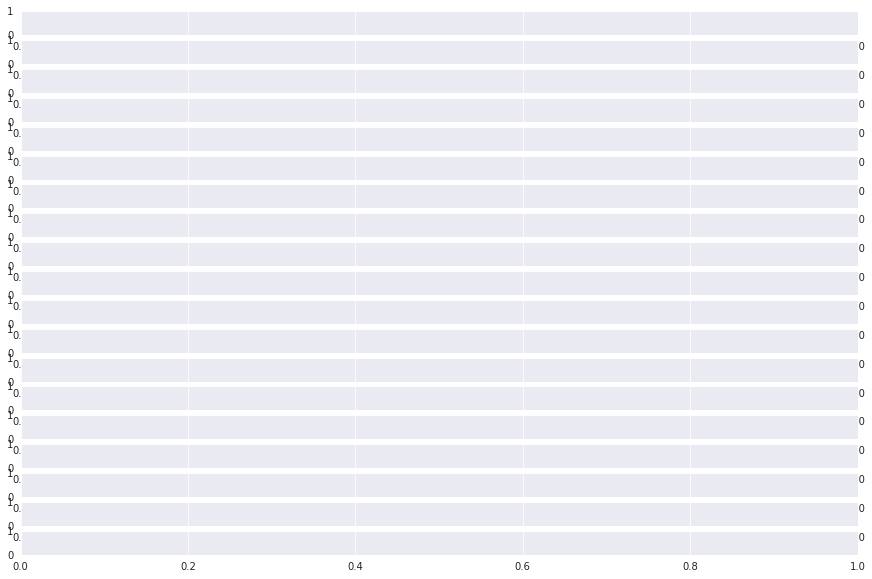

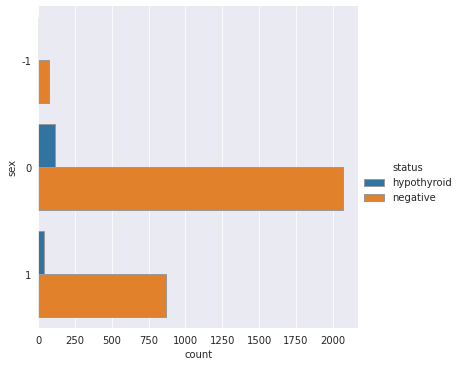

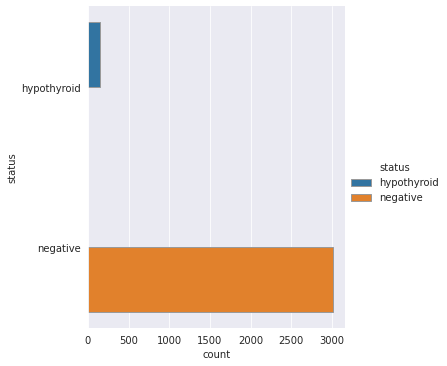

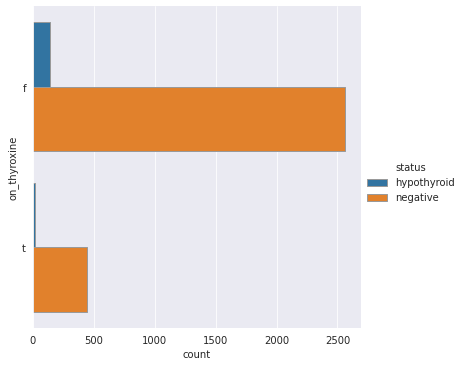

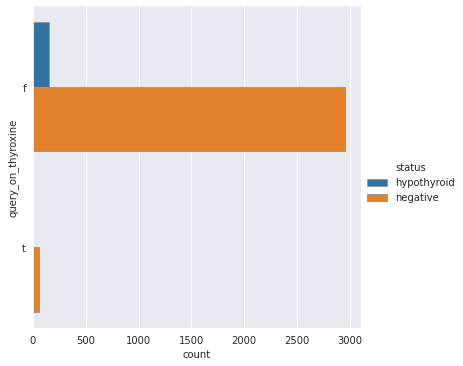

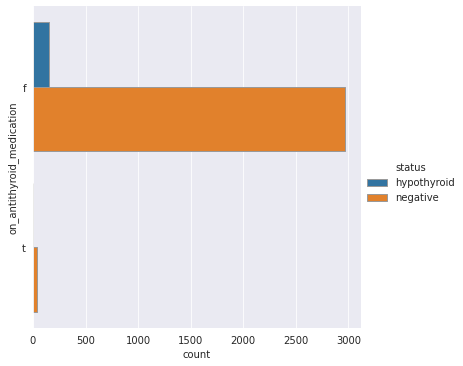

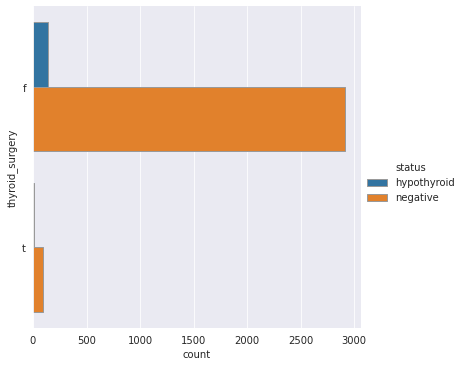

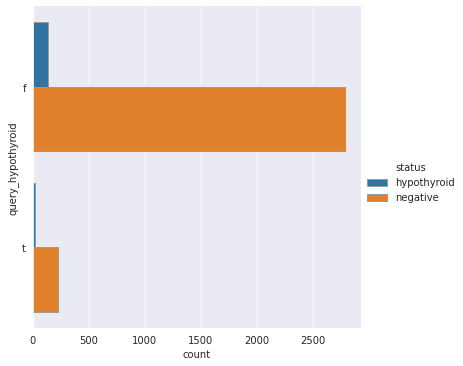

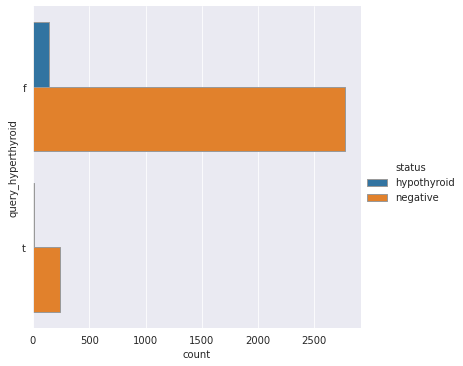

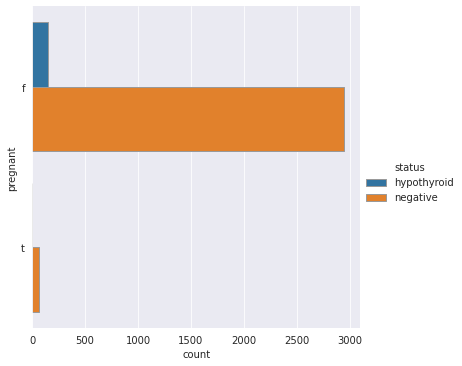

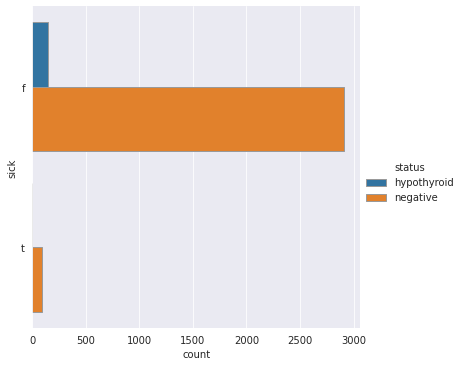

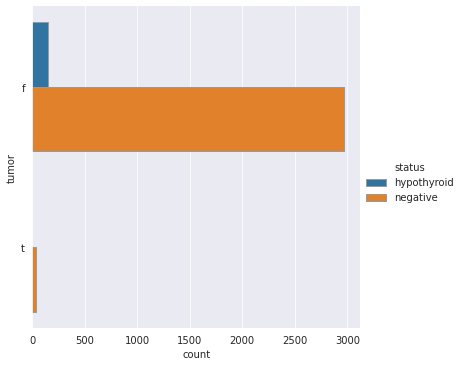

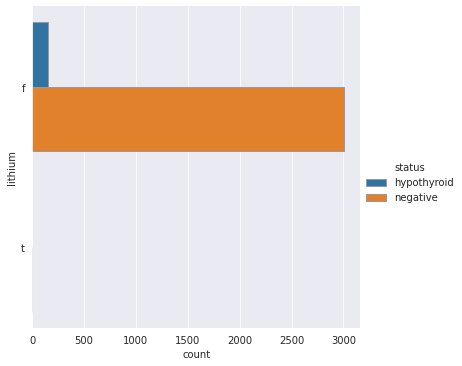

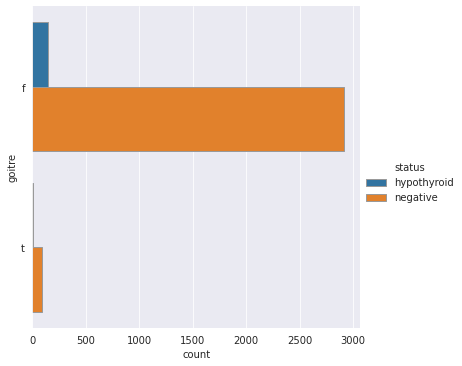

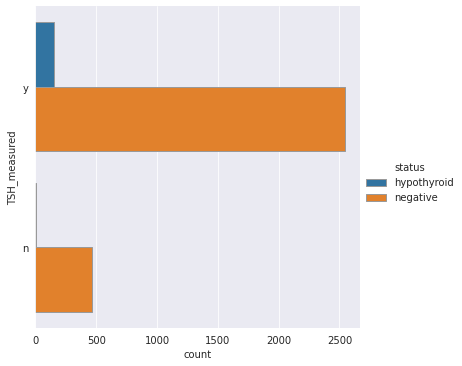

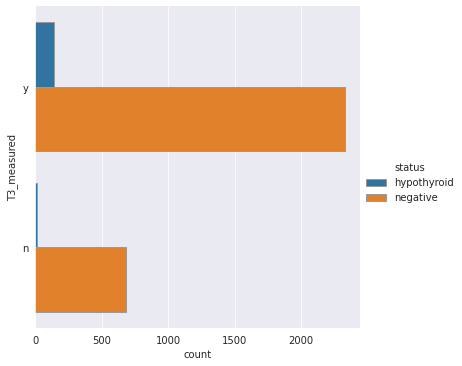

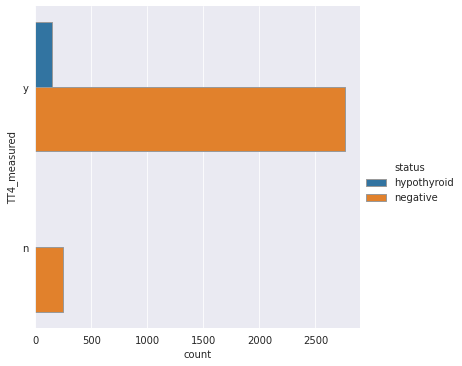

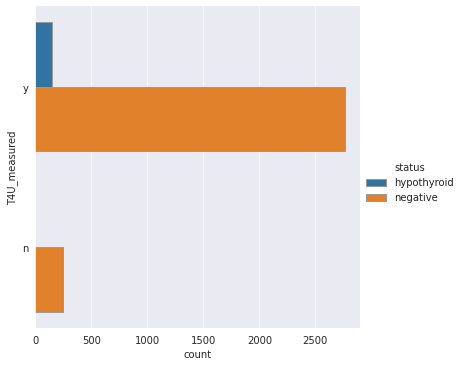

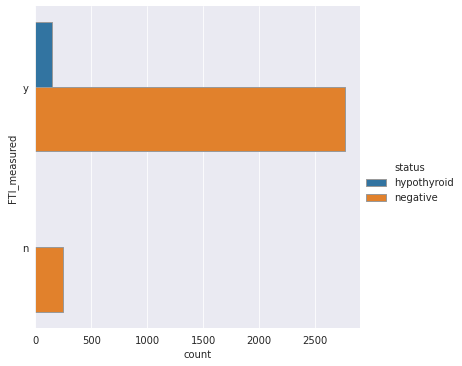

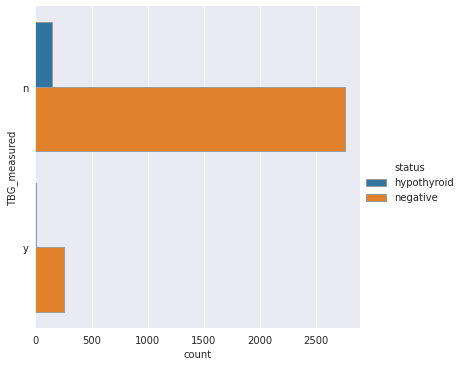

In [ ]:
categorical_columns = ['sex', 'status','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery', 
              'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre',
              'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'] 

sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical_columns), figsize=(15,10))
for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", hue="status", edgecolor=".6", data=Thyroid_df, ax=subplot);

In [ ]:
Dataset.corr()

status       age  ...       FTI  TBG_measured
status                     1.000000 -0.035415  ...  0.313482      0.050812
age                       -0.035415  1.000000  ...  0.020302     -0.128832
sex                        0.011680  0.014628  ... -0.184920     -0.083652
on_thyroxine               0.033652 -0.001492  ...  0.115905     -0.064897
query_on_thyroxine         0.029785 -0.019763  ... -0.002876     -0.039811
on_antithyroid_medication  0.013020 -0.058943  ... -0.019289      0.045730
thyroid_surgery           -0.041868 -0.012284  ... -0.026014     -0.009997
query_hypothyroid         -0.047477  0.048322  ... -0.045193     -0.042562
query_hyperthyroid         0.025616 -0.087881  ...  0.073953      0.103840
pregnant                   0.021306 -0.159354  ... -0.007145     -0.001472
sick                       0.023216  0.064631  ... -0.021787     -0.033963
tumor                      0.025340 -0.063094  ... -0.025553     -0.023569
lithium                    0.005632 -0.021320  ... -0.016621     -0.007528
goitre                    -0.010847 -0.037187  ... -0.003654      0.091634
TSH_measured              -0.089129  0.201436  ... -0.009535     -0.701948
TSH                       -0.587431  0.009475  ... -0.243889     -0.054207
T3_measured               -0.068682  0.176849  ... -0.027638     -0.550054
T3                         0.181636 -0.256469  ...  0.291282     -0.037643
TT4_measured              -0.065451  0.126393  ...  0.040261     -0.968221
TT4                        0.374453 -0.087354  ...  0.685251     -0.025362
T4U_measured              -0.065308  0.124116  ...  0.039832     -0.970356
T4U                       -0.082598 -0.191816  ... -0.282071     -0.015878
FTI_measured              -0.065165  0.124665  ...  0.038934     -0.972504
FTI                        0.313482  0.020302  ...  1.000000     -0.039816
TBG_measured               0.050812 -0.128832  ... -0.039816      1.000000

[25 rows x 25 columns]

We have performed bivariate analysis as well, examining how the variables relate to one another, and the relationships seems relatively weak to moderate except for T3 and FTI, T3 and TT4. We shall examine this closely. 

In [ ]:
# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 

%config InlineBackend.figure_format = 'retina' 
import seaborn as sns

plt.style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(10, 8)})

from sklearn import preprocessing 


Text(5.334999999999994, 0.5, 'TT4')

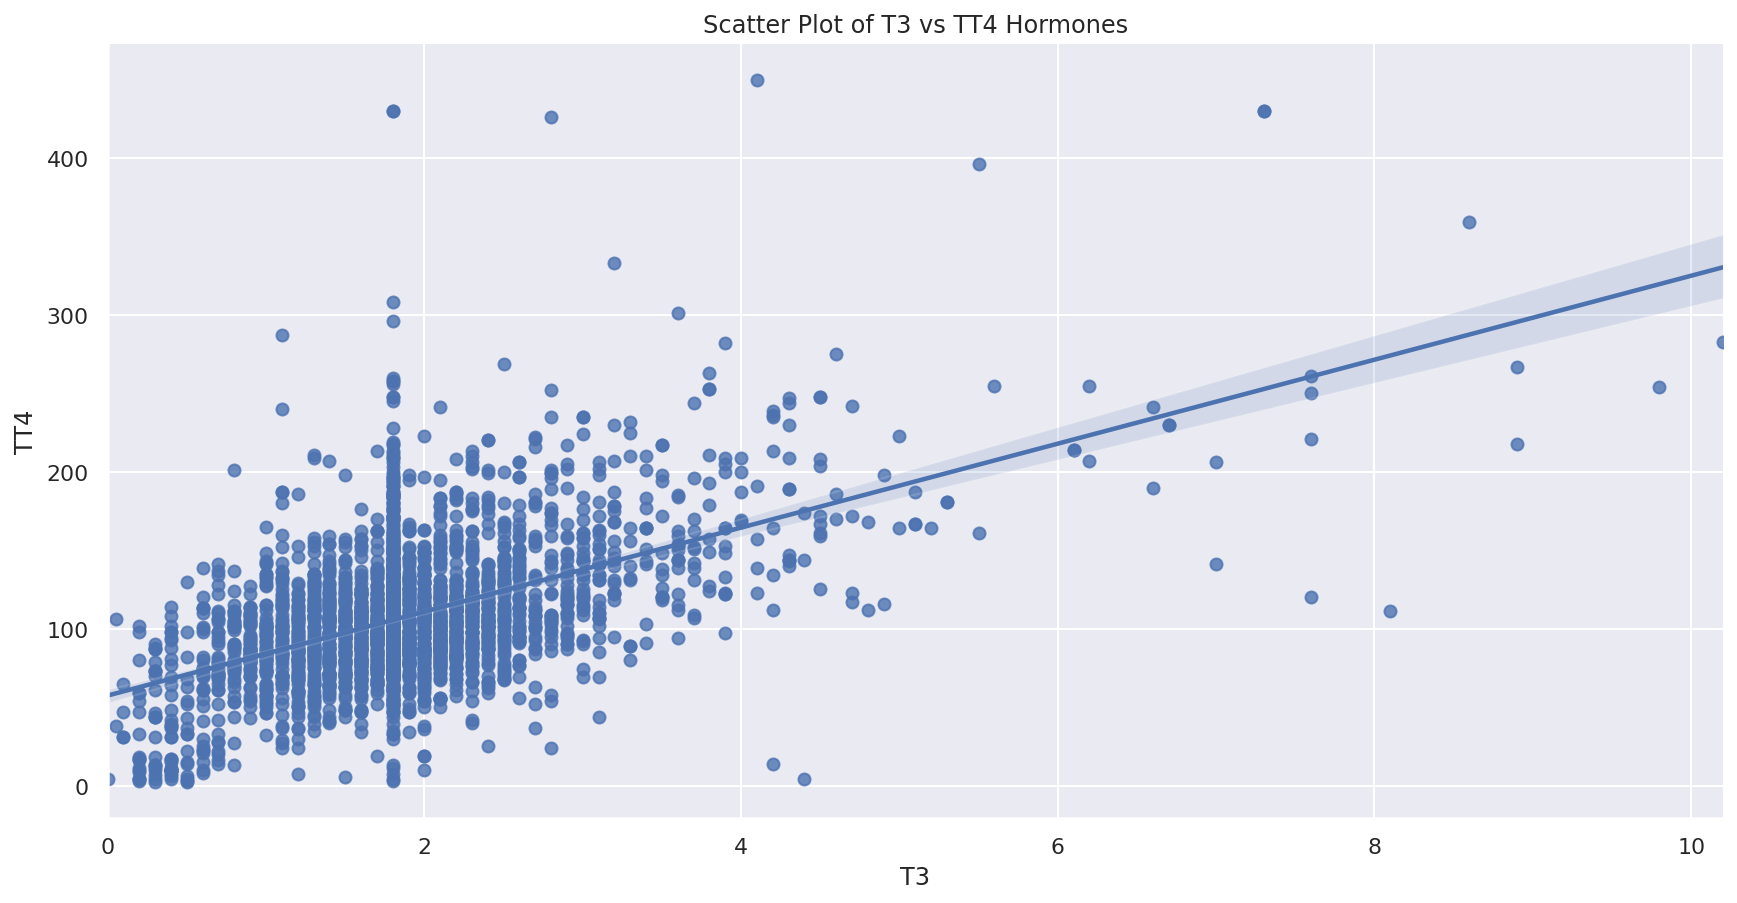

In [ ]:
sns.lmplot('T3', 'TT4', data=Dataset, fit_reg=True, size=6, aspect=2)
plt.title("Scatter Plot of T3 vs TT4 Hormones")
plt.xlabel("T3")
plt.ylabel("TT4")

Text(5.334999999999994, 0.5, 'FTI')

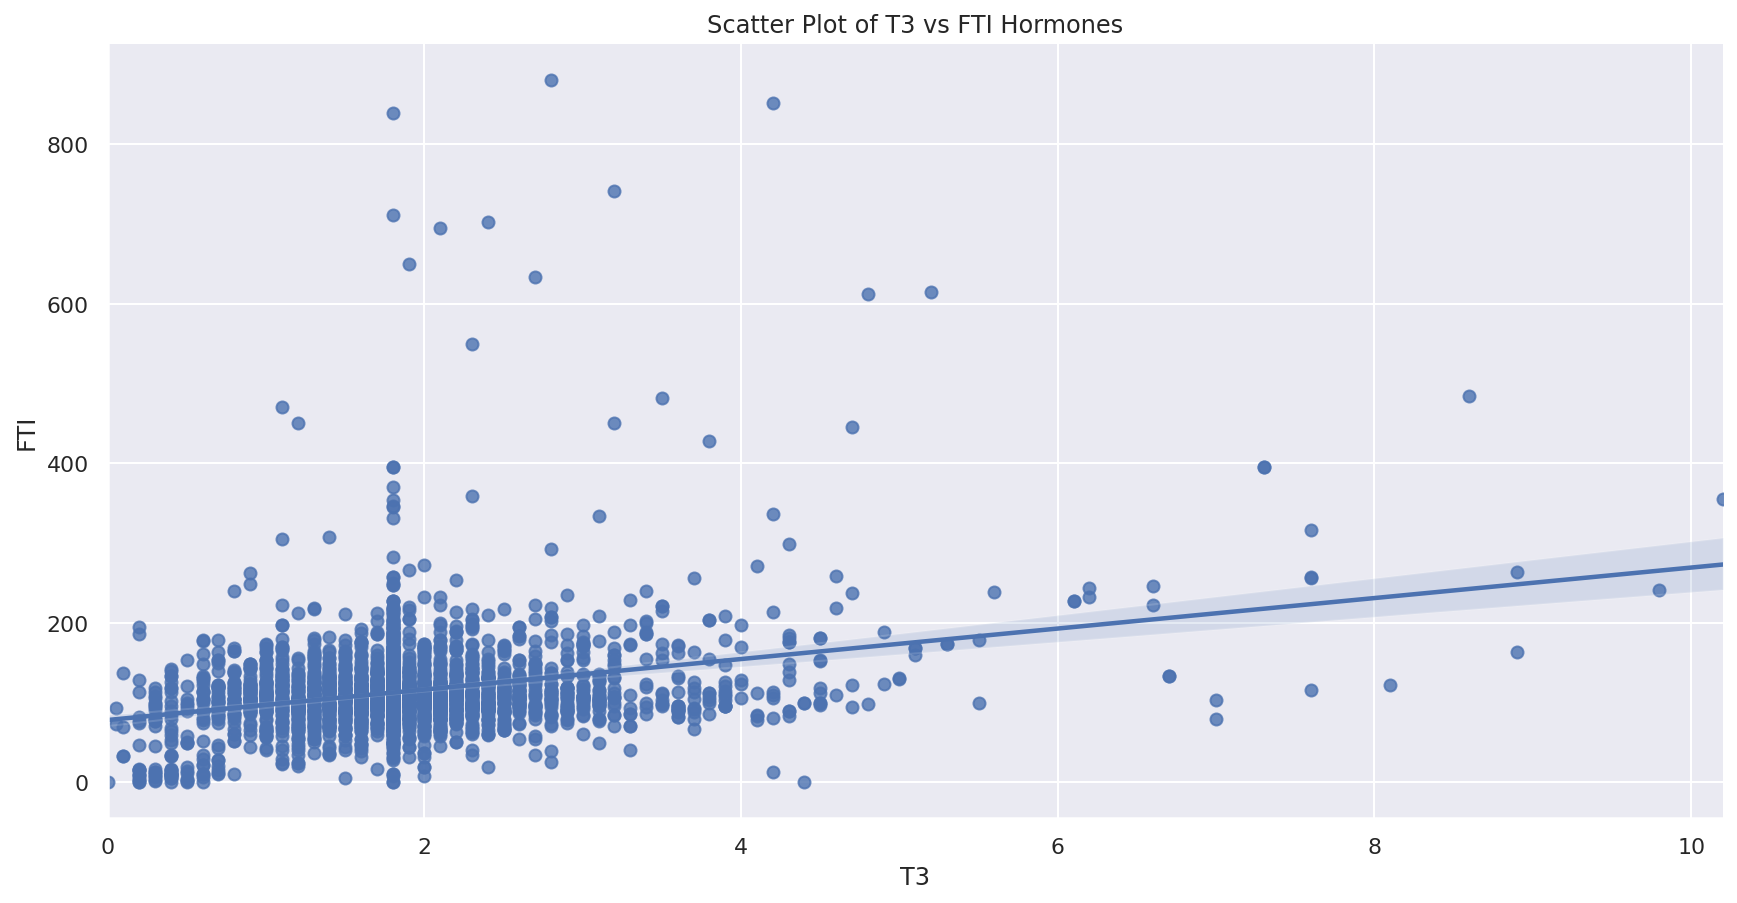

In [ ]:
sns.lmplot('T3', 'FTI', data=Dataset, fit_reg=True, size=6, aspect=2)
plt.title("Scatter Plot of T3 vs FTI Hormones")
plt.xlabel("T3")
plt.ylabel("FTI")

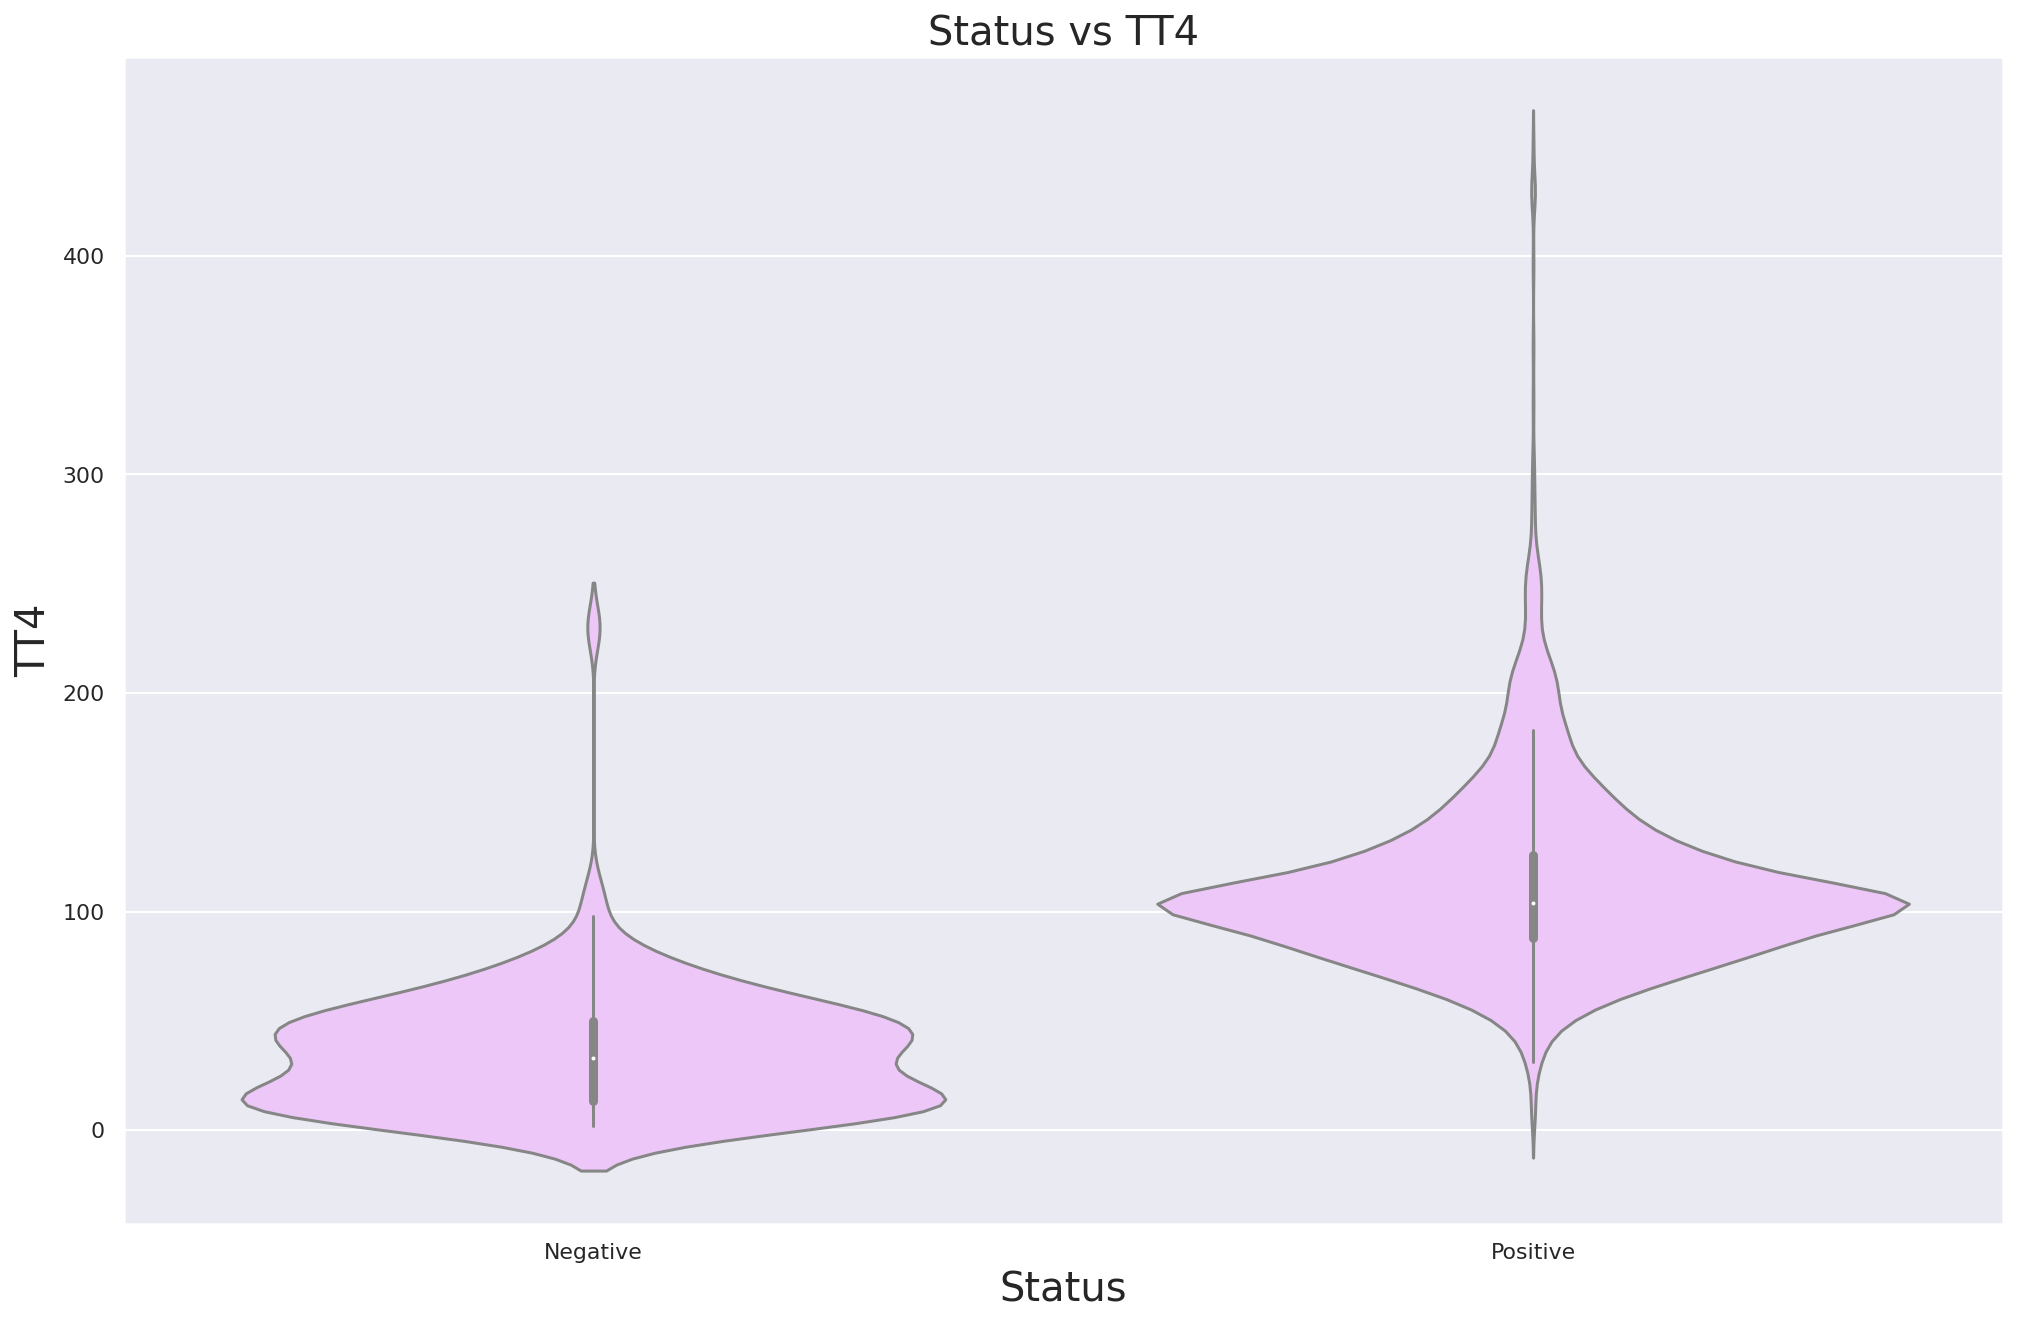

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x=Dataset['status'], y=Dataset['TT4'], color='#F0BFFF')
plt.xticks([0,1], ['Negative', 'Positive'])
plt.ylabel('TT4',fontsize=20)
plt.xlabel('Status', fontsize=20)
plt.title('Status vs TT4', fontsize=20)
plt.show()

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',300)
Thyroid_df.groupby(['sex', 'status']).count().sort_values(by = ['status','sex'], ascending =False)

age  on_thyroxine  query_on_thyroxine  \
sex status                                                
 1  negative      870           870                 870   
 0  negative     2071          2071                2071   
-1  negative       71            71                  71   
 1  hypothyroid    38            38                  38   
 0  hypothyroid   111           111                 111   
-1  hypothyroid     2             2                   2   

                 on_antithyroid_medication  thyroid_surgery  \
sex status                                                    
 1  negative                           870              870   
 0  negative                          2071             2071   
-1  negative                            71               71   
 1  hypothyroid                         38               38   
 0  hypothyroid                        111              111   
-1  hypothyroid                          2                2   

                 query_hypothyroid  query_hyperthyroid  pregnant  sick  tumor  \
sex status                                                                      
 1  negative                   870                 870       870   870    870   
 0  negative                  2071                2071      2071  2071   2071   
-1  negative                    71                  71        71    71     71   
 1  hypothyroid                 38                  38        38    38     38   
 0  hypothyroid                111                 111       111   111    111   
-1  hypothyroid                  2                   2         2     2      2   

                 lithium  goitre  TSH_measured   TSH  T3_measured    T3  \
sex status                                                                
 1  negative         870     870           870   870          870   870   
 0  negative        2071    2071          2071  2071         2071  2071   
-1  negative          71      71            71    71           71    71   
 1  hypothyroid       38      38            38    38           38    38   
 0  hypothyroid      111     111           111   111          111   111   
-1  hypothyroid        2       2             2     2            2     2   

                 TT4_measured   TT4  T4U_measured   T4U  FTI_measured   FTI  \
sex status                                                                    
 1  negative              870   870           870   870           870   870   
 0  negative             2071  2071          2071  2071          2071  2071   
-1  negative               71    71            71    71            71    71   
 1  hypothyroid            38    38            38    38            38    38   
 0  hypothyroid           111   111           111   111           111   111   
-1  hypothyroid             2     2             2     2             2     2   

                 TBG_measured  
sex status                     
 1  negative              870  
 0  negative             2071  
-1  negative               71  
 1  hypothyroid            38  
 0  hypothyroid           111  
-1  hypothyroid             2

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',50)
Thyroid_df.groupby(["age"]).count().sort_values(by = ['status'], ascending =False)

status  sex  on_thyroxine  query_on_thyroxine  \
age                                                        
51.154214     446  446           446                 446   
59.000000      64   64            64                  64   
60.000000      64   64            64                  64   
62.000000      63   63            63                  63   
28.000000      60   60            60                  60   
...           ...  ...           ...                 ...   
5.000000        1    1             1                   1   
90.000000       1    1             1                   1   
93.000000       1    1             1                   1   
97.000000       1    1             1                   1   
98.000000       1    1             1                   1   

           on_antithyroid_medication  thyroid_surgery  query_hypothyroid  \
age                                                                        
51.154214                        446              446                446   
59.000000                         64               64                 64   
60.000000                         64               64                 64   
62.000000                         63               63                 63   
28.000000                         60               60                 60   
...                              ...              ...                ...   
5.000000                           1                1                  1   
90.000000                          1                1                  1   
93.000000                          1                1                  1   
97.000000                          1                1                  1   
98.000000                          1                1                  1   

           query_hyperthyroid  pregnant  sick  tumor  lithium  goitre  \
age                                                                     
51.154214                 446       446   446    446      446     446   
59.000000                  64        64    64     64       64      64   
60.000000                  64        64    64     64       64      64   
62.000000                  63        63    63     63       63      63   
28.000000                  60        60    60     60       60      60   
...                       ...       ...   ...    ...      ...     ...   
5.000000                    1         1     1      1        1       1   
90.000000                   1         1     1      1        1       1   
93.000000                   1         1     1      1        1       1   
97.000000                   1         1     1      1        1       1   
98.000000                   1         1     1      1        1       1   

           TSH_measured  TSH  T3_measured   T3  TT4_measured  TT4  \
age                                                                 
51.154214           446  446          446  446           446  446   
59.000000            64   64           64   64            64   64   
60.000000            64   64           64   64            64   64   
62.000000            63   63           63   63            63   63   
28.000000            60   60           60   60            60   60   
...                 ...  ...          ...  ...           ...  ...   
5.000000              1    1            1    1             1    1   
90.000000             1    1            1    1             1    1   
93.000000             1    1            1    1             1    1   
97.000000             1    1            1    1             1    1   
98.000000             1    1            1    1             1    1   

           T4U_measured  T4U  FTI_measured  FTI  TBG_measured  
age                                                            
51.154214           446  446           446  446           446  
59.000000            64   64            64   64            64  
60.000000            64   64            64   64            64  
62.000000            63   63            63   63            63  
28.000000

## c) Multivariate Analysis

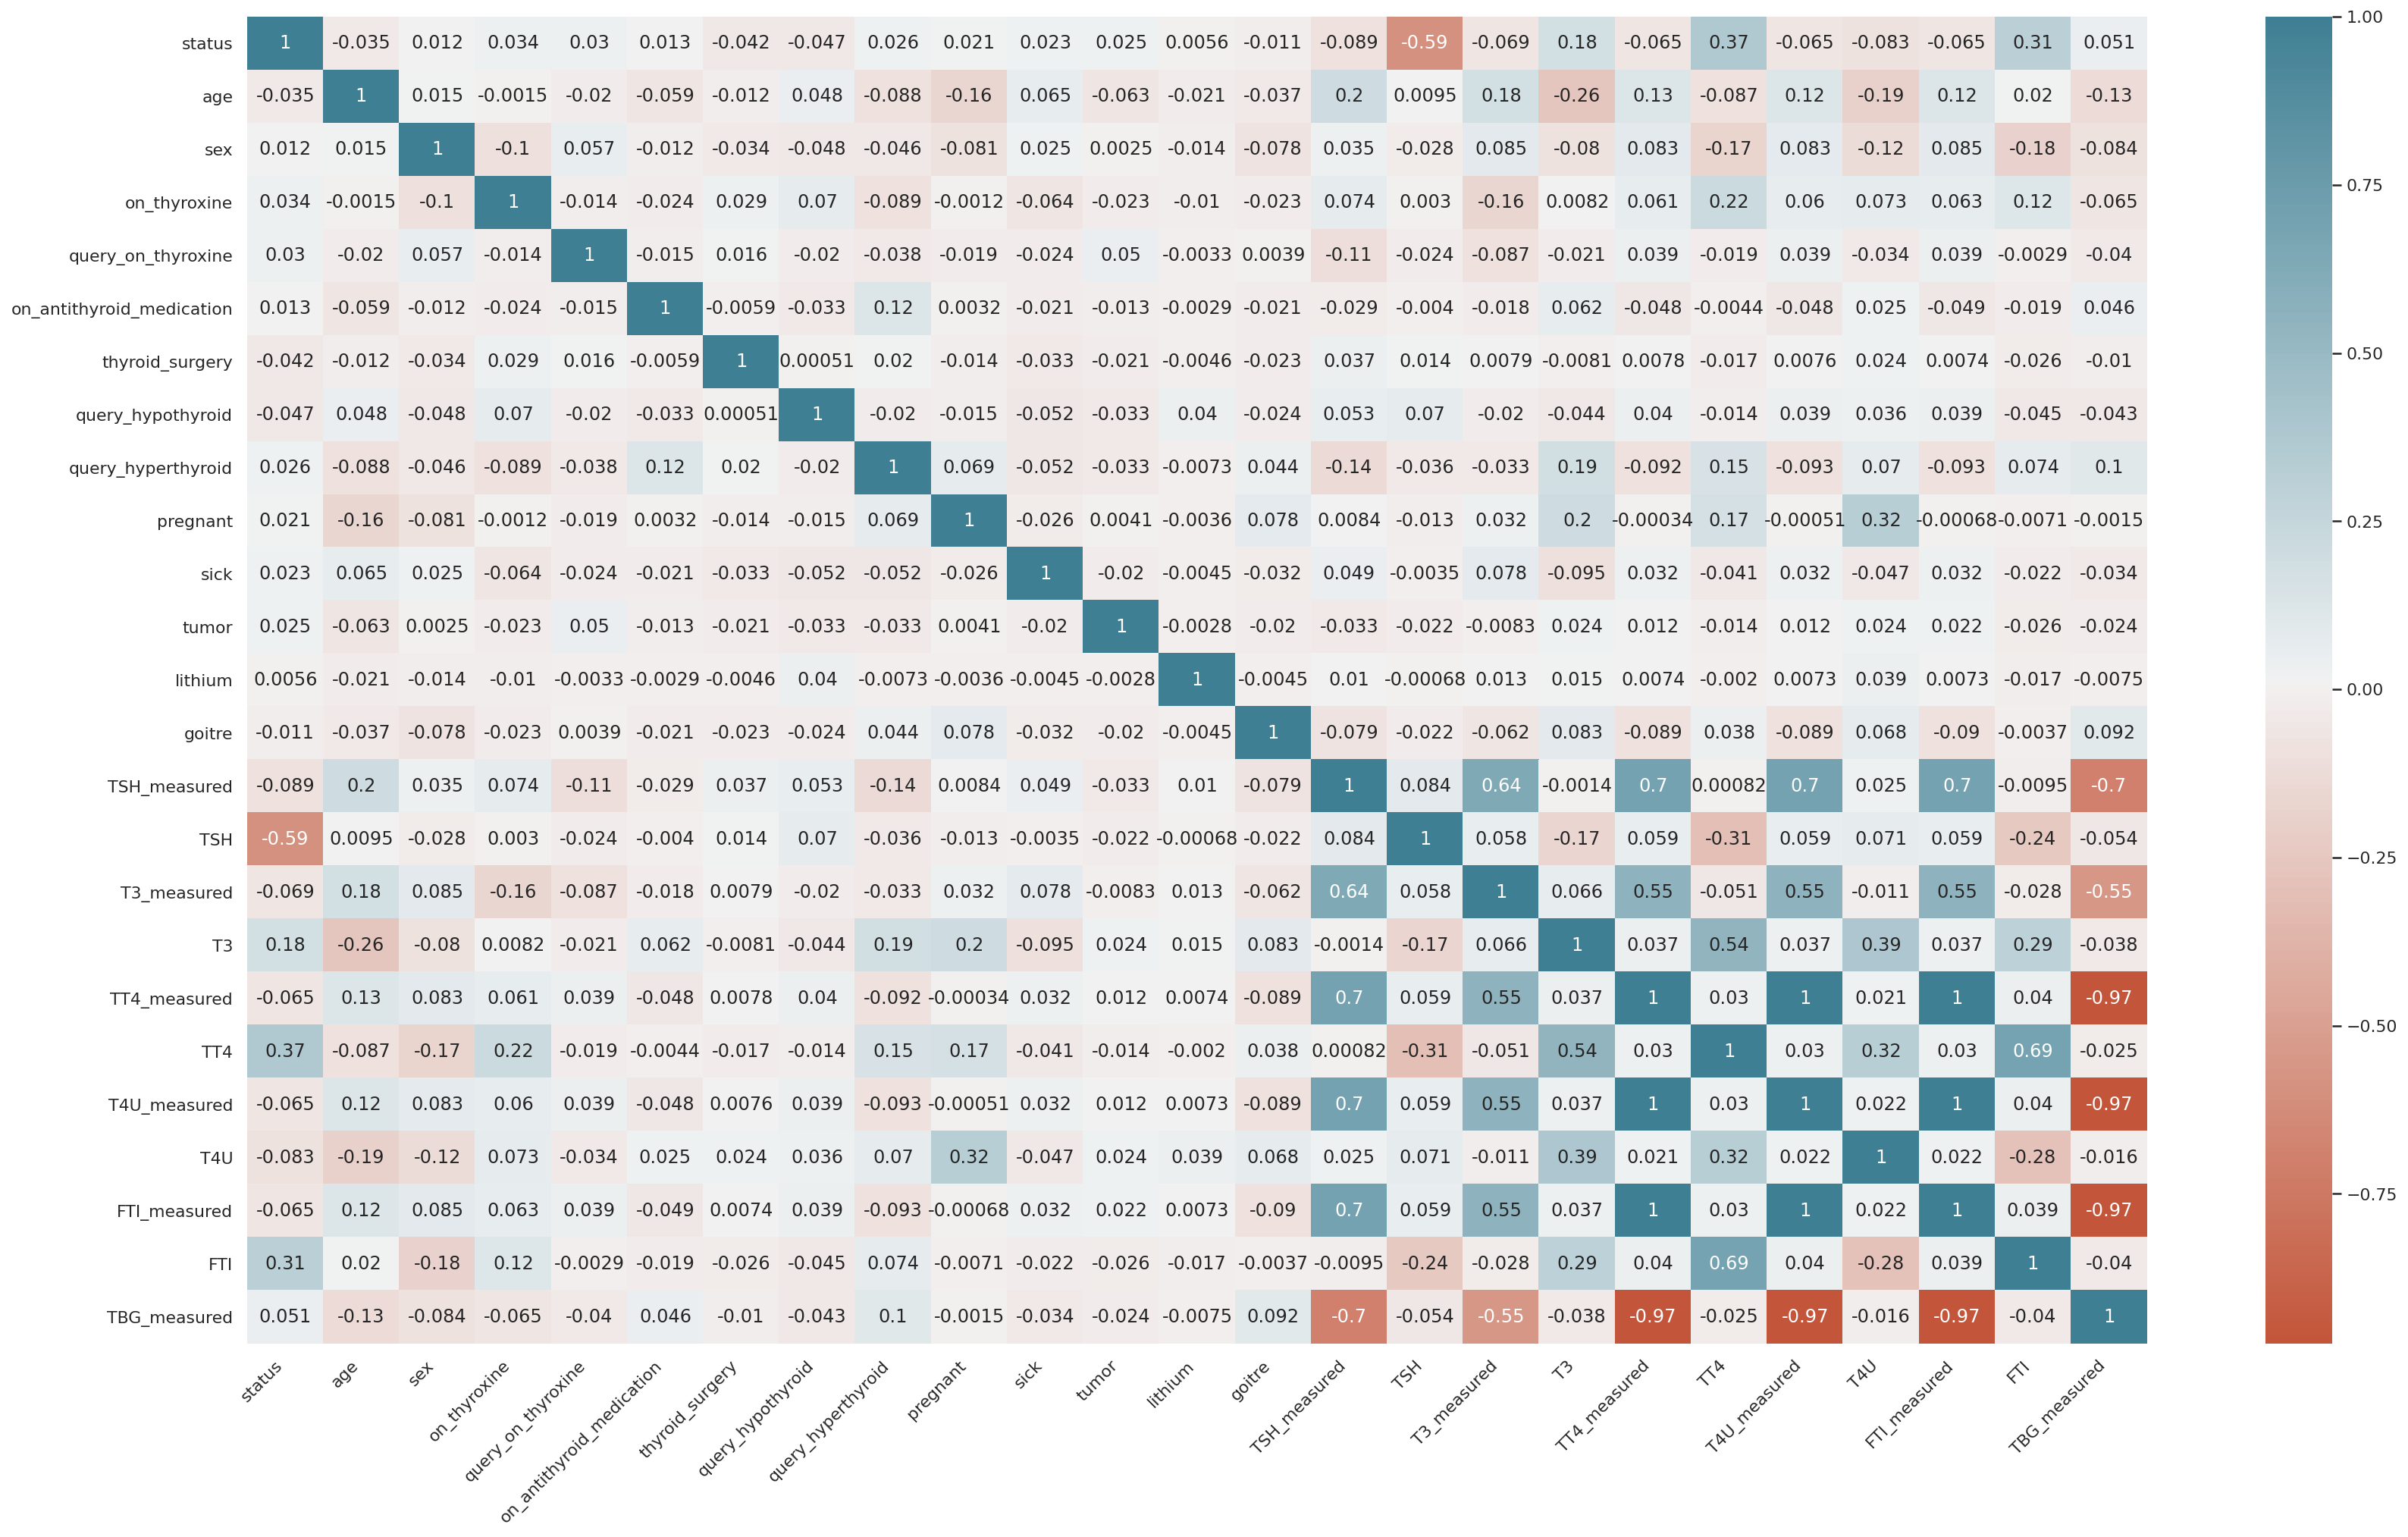

In [ ]:
plt.figure(figsize = (25,15))
ax = sns.heatmap(Dataset.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

In [ ]:
Correlation = Thyroid_df.corr()

Vif = pd.DataFrame(np.linalg.inv(Correlation.values), index = Correlation.index, columns = Correlation.columns)
Vif

age       sex       TSH        T3       TT4       T4U       FTI
age  1.089088  0.006665 -0.003076  0.281316 -0.108754  0.139275  0.010238
sex  0.006665  1.090821  0.049389 -0.071744 -0.176499  0.344587  0.452666
TSH -0.003076  0.049389  1.176191  0.093792  0.654928 -0.409110 -0.295452
T3   0.281316 -0.071744  0.093792  1.621174 -0.458828 -0.524859 -0.301958
TT4 -0.108754 -0.176499  0.654928 -0.458828  4.731488 -2.478689 -3.678473
T4U  0.139275  0.344587 -0.409110 -0.524859 -2.478689  2.839344  2.613417
FTI  0.010238  0.452666 -0.295452 -0.301958 -3.678473  2.613417  4.357241

In [ ]:
X = Dataset.drop('status', axis=1)
y = Dataset['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform((X_test))

Factors = pd.DataFrame(index = X.columns.values, data= lda.coef_[0].T)
Factors.sort_values(0, ascending=False)

0
TT4                        3.192146e+00
T4U_measured               6.895933e-01
sick                       2.735663e-01
T3                         2.388766e-01
sex                        1.664477e-01
T3_measured                1.458927e-01
tumor                      1.199911e-01
on_antithyroid_medication  1.075625e-01
query_on_thyroxine         1.041873e-01
pregnant                   8.785439e-02
lithium                   -1.185385e-15
query_hypothyroid         -8.254492e-02
on_thyroxine              -8.351973e-02
goitre                    -9.083066e-02
age                       -2.349732e-01
thyroid_surgery           -3.131585e-01
TT4_measured              -3.507989e-01
TSH_measured              -4.127862e-01
query_hyperthyroid        -4.643886e-01
FTI                       -9.358515e-01
TBG_measured              -1.722043e+00
T4U                       -1.727463e+00
FTI_measured              -2.205254e+00
TSH                       -3.870541e+00

This displays the contribution that each factor has when predicting a patient's status. 

In [ ]:
Info = pd.read_csv("/content/hypothyroid.csv")

Info.replace('?', np.nan, inplace=True)


In [ ]:
cat_columns = ['status' ,	'on_thyroxine' ,	'query_on_thyroxine' ,	'on_antithyroid_medication'	, 'thyroid_surgery' ,	'query_hypothyroid' ,	'query_hyperthyroid' , 'pregnant' ,	'sick' ,	'tumor' ,	'lithium' ,	'goitre' ,	'TSH_measured' , 'T3_measured' , 'TT4_measured' ,	'T4U_measured' , 'FTI_measured',	'TBG_measured']

for column in cat_columns:
  Info[column] = Info[column].astype('str')

Info['sex'] = Info['sex'].astype('category')
Info['sex'] = Info['sex'].cat.codes

num_columns = ['age' , 'TSH' , 'T3' , 'TT4' , 'T4U' , 'FTI']

for column in num_columns:
  Info[column] = Info[column].astype('float')

In [ ]:
def fillmissing(dataframe_name, column_name,approach):
    if approach == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
    elif approach=='median':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))
    elif approach=='mode':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))

In [ ]:
fillmissing(Info,'T3','median') 
fillmissing(Info,'TSH','median')
fillmissing(Info,'age','mean') 
fillmissing(Info,'TT4','median')
fillmissing(Info,'T4U','median')
fillmissing(Info,'FTI','median')
fillmissing(Info,'sex','mode')

In [ ]:
Info['sex'] = Info['sex'].astype('category')
Info.drop('TBG', axis=1, inplace=True)

In [ ]:
cols = Info.columns
num_cols = Info._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

df_Categorical = Info[cat_cols]

In [ ]:
df_Categorical.columns

Columns = ['pregnant', 'query_hypothyroid', 'thyroid_surgery', 'TT4_measured',
       'on_thyroxine', 'TSH_measured', 'status', 'lithium', 'T3_measured',
       'T4U_measured', 'tumor', 'sick', 'sex', 'on_antithyroid_medication',
       'query_hyperthyroid', 'TBG_measured', 'goitre', 'FTI_measured',
       'query_on_thyroxine']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_Categorical[Columns] = df_Categorical[Columns].apply(lambda col:le.fit_transform(col))

In [ ]:
X_cat = df_Categorical.drop('status', axis=1)
y_cat = df_Categorical['status'].eq('yes').mul(1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_cat)

In [ ]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.45963155 0.24418288 0.14161662 0.0834288  0.07114014]


The correlation tests reveals that the degree of multicollinearity is low, with TT4 and TF4 displaying relatively high correlation to other factors. However we shall not drop these columns given their implied importance in predicting the status of a patient. Using PCA, we are able to show how the first five principle compoennts constribute to the variance displayed. The first three factors contribute to about 84% of the variance explained, while the first five explain 99.9%. Moving forward, we now know that most features are not necessary to make a prediction. 

# 5. Implementing the Solution

## a) Baseline Model

We are going to apply a logistic regression model because the prediction variable is in binary form. 

In [ ]:
from sklearn import preprocessing 

# Modelling library
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error,roc_curve, auc,f1_score,recall_score,precision_score,classification_report, confusion_matrix

# Hide warnings related to numpy 
import warnings

In [ ]:
#we create a dictionary to store values from each model
dict = {
    'Model':['Logistic Regression', 'Random Forest', 'AdaBoost', 'GBR', 'GBR Optimized', 'SVM RBF', 'SVM Linear', 'SVM Polynomial'],
    'R2':[0,0,0,0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0,0,0,0],
    'F1 Score':[0,0,0,0,0,0,0,0],
    'Recall':[0,0,0,0,0,0,0,0],
    'Precision':[0,0,0,0,0,0,0,0],
    'RMSE':[0,0,0,0,0,0,0,0],
    'TP':[0,0,0,0,0,0,0,0],
    'TN':[0,0,0,0,0,0,0,0],
    'FP':[0,0,0,0,0,0,0,0],
    'FN':[0,0,0,0,0,0,0,0]}
Results_df = pd.DataFrame(dict,columns = ['Model', 'R2', 'Accuracy Score', 'F1 Score', 'Recall', 'Precision', 'RMSE', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
def model_results(model_type, y_test_data, y_prediction_data):

  index_val = Results_df[Results_df['Model']==model_type].index

  Results_df.loc[index_val,'F1 score'] = f1_score(y_test_data, y_prediction_data,average='weighted')
  Results_df.loc[index_val,'Accuracy Score'] =  accuracy_score(y_test_data, y_prediction_data)
  Results_df.loc[index_val,'Recall'] = recall_score(y_test_data, y_prediction_data,average='weighted')
  Results_df.loc[index_val,'Precision'] = precision_score(y_test_data, y_prediction_data,average='weighted')
  Results_df.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data),y_prediction_data))
  Results_df.loc[index_val,'R2'] = r2_score(y_test_data, y_prediction_data)
    
  tn, fp, fn, tp = confusion_matrix(y_test_data, y_prediction_data).ravel()
  Results_df.loc[index_val,'TP'] =tp
  Results_df.loc[index_val,'TN'] =tn
  Results_df.loc[index_val,'FP'] =fp
  Results_df.loc[index_val,'FN'] =fn

  return(Results_df)


In [ ]:
Dataset.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression

features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

X = Dataset.drop('status', axis=1).values
y = Dataset['status'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_reg = Logreg.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': y_pred_reg.flatten()})
comparison_frame.head()

Actual  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1

In [ ]:
model_results('Logistic Regression',y_test, y_pred_reg)


Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.000000        0.000000         0  0.000000   
2             AdaBoost  0.000000        0.000000         0  0.000000   
3                  GBR  0.000000        0.000000         0  0.000000   
4        GBR Optimized  0.000000        0.000000         0  0.000000   
5              SVM RBF  0.000000        0.000000         0  0.000000   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.000000  0.000000    0   0   0   0       NaN  
2   0.000000  0.000000    0   0   0   0       NaN  
3   0.000000  0.000000    0   0   0   0       NaN  
4   0.000000  0.000000    0   0   0   0       NaN  
5   0.000000  0.000000    0   0   0   0       NaN  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

An analysis of the model reveals that the data has more positives than negatives which could be attributed to the dataset being unbalanced. Only sixteen tests were misclassifed with ten false positives and six false negatives. The high accuracy and F1 scores of 97% indicate a model that performed well however, the high RMSE scores indicate further examination is needed.

## b) Random Forest Classifier

In [ ]:
Forest = RandomForestClassifier(n_estimators=200, random_state=0, min_samples_split=20, max_depth=5)
Forest = Forest.fit(X_train, y_train)

y_pred_rf = Forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': y_pred_rf.flatten()})
comparison_frame.head()

Actual  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1

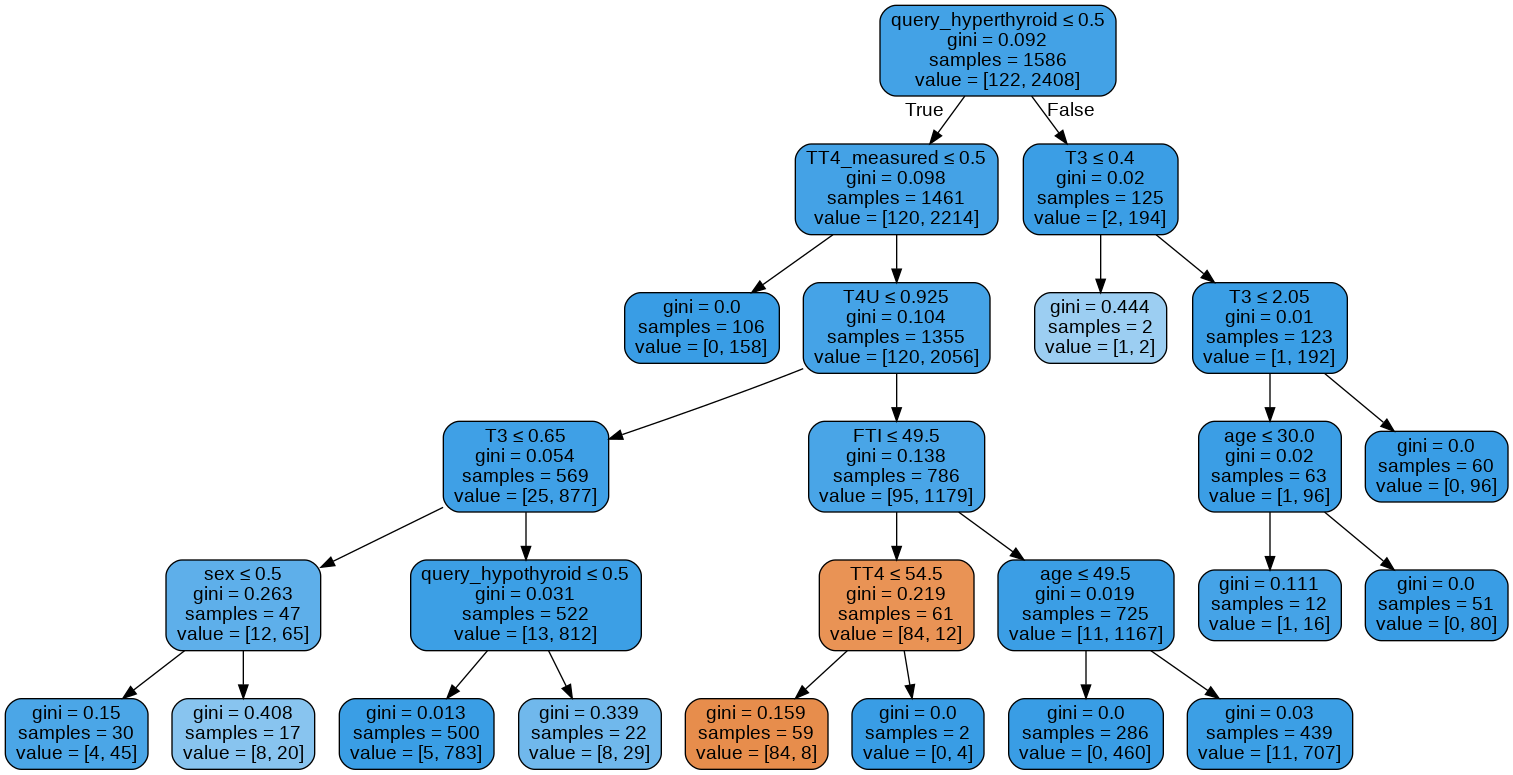

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

Tree = Forest.estimators_[50]

export_graphviz(Tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
Importances = list(Tree.feature_importances_)

Feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(features, Importances)]

Feature_importance = sorted(Feature_importance, key= lambda x: x[1], reverse=True)

[print("Variable: {0} Importance: {1}".format(*pair)) for pair in Feature_importance];

Variable: FTI Importance: 0.88
Variable: TT4 Importance: 0.04
Variable: query_hypothyroid Importance: 0.02
Variable: T3 Importance: 0.02
Variable: T4U Importance: 0.02
Variable: sex Importance: 0.01
Variable: TT4_measured Importance: 0.01
Variable: age Importance: 0.0
Variable: on_thyroxine Importance: 0.0
Variable: query_on_thyroxine Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery Importance: 0.0
Variable: query_hyperthyroid Importance: 0.0
Variable: pregnant Importance: 0.0
Variable: sick Importance: 0.0
Variable: tumor Importance: 0.0
Variable: lithium Importance: 0.0
Variable: goitre Importance: 0.0
Variable: TSH_measured Importance: 0.0
Variable: TSH Importance: 0.0
Variable: T3_measured Importance: 0.0
Variable: T4U_measured Importance: 0.0
Variable: FTI_measured Importance: 0.0
Variable: TBG_measured Importance: 0.0


Text(0.5, 1.0, 'Variable Importance')

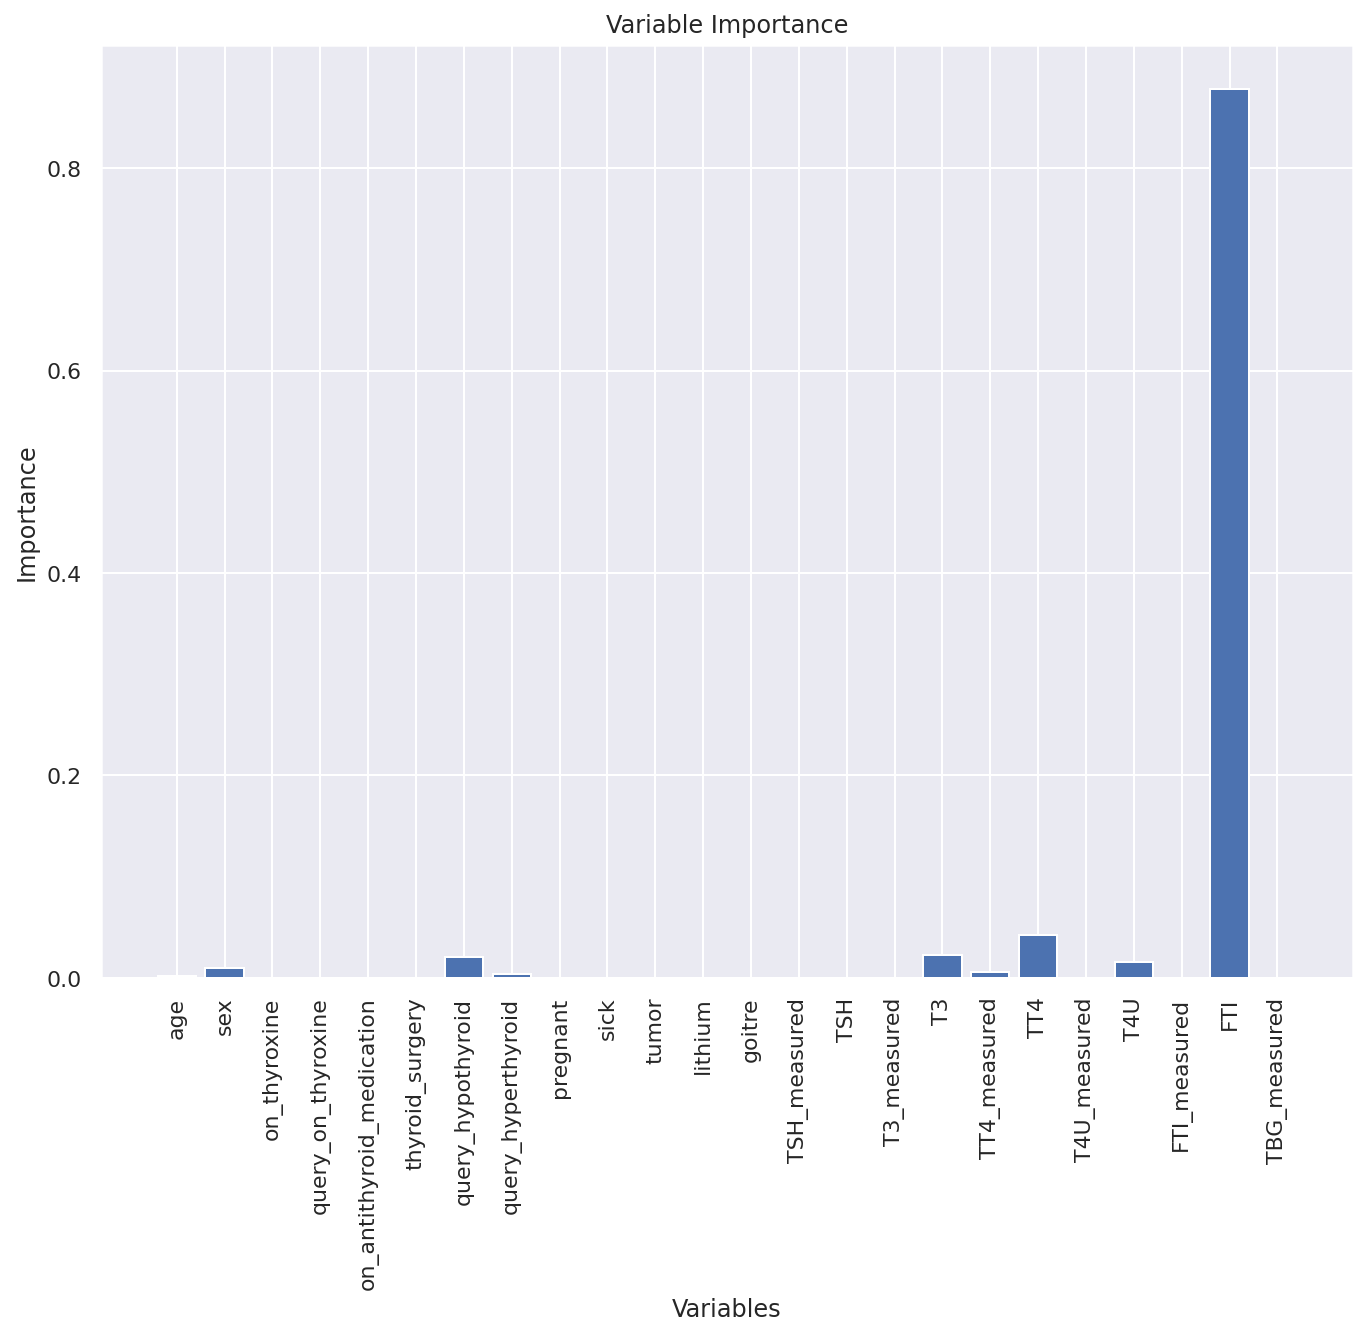

In [ ]:
x_values = list(range(len(Importances)))

plt.bar(x_values, Importances, orientation='vertical')

plt.xticks(x_values, features, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variables'); plt.title('Variable Importance')

In [ ]:
model_results('Random Forest',y_test, y_pred_rf)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.000000        0.000000         0  0.000000   
3                  GBR  0.000000        0.000000         0  0.000000   
4        GBR Optimized  0.000000        0.000000         0  0.000000   
5              SVM RBF  0.000000        0.000000         0  0.000000   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.000000  0.000000    0   0   0   0       NaN  
3   0.000000  0.000000    0   0   0   0       NaN  
4   0.000000  0.000000    0   0   0   0       NaN  
5   0.000000  0.000000    0   0   0   0       NaN  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

## c) AdaBoost Classifier

In [ ]:
Ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=0)

Ada_boost = Ada_boost.fit(X_train, y_train)

y_pred_ada = Ada_boost.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_ada})
comparison_frame.head()

Actual  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1

In [ ]:
model_results('AdaBoost',y_test,y_pred_ada)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.000000        0.000000         0  0.000000   
4        GBR Optimized  0.000000        0.000000         0  0.000000   
5              SVM RBF  0.000000        0.000000         0  0.000000   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.000000  0.000000    0   0   0   0       NaN  
4   0.000000  0.000000    0   0   0   0       NaN  
5   0.000000  0.000000    0   0   0   0       NaN  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

## d) Gradient Boost Classifier

In [ ]:
#we create a baseline model 

Gbr = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=5)

Gbr.fit(X_train, y_train)

y_pred_gbr = Gbr.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_gbr})
comparison_frame.head()

Actual  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1

In [ ]:
model_results('GBR',y_test, y_pred_gbr)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.000000        0.000000         0  0.000000   
5              SVM RBF  0.000000        0.000000         0  0.000000   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.000000  0.000000    0   0   0   0       NaN  
5   0.000000  0.000000    0   0   0   0       NaN  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

## e) Optimised GBR

We shall tune the various hyperparameters to obtain the best ones to apply. 

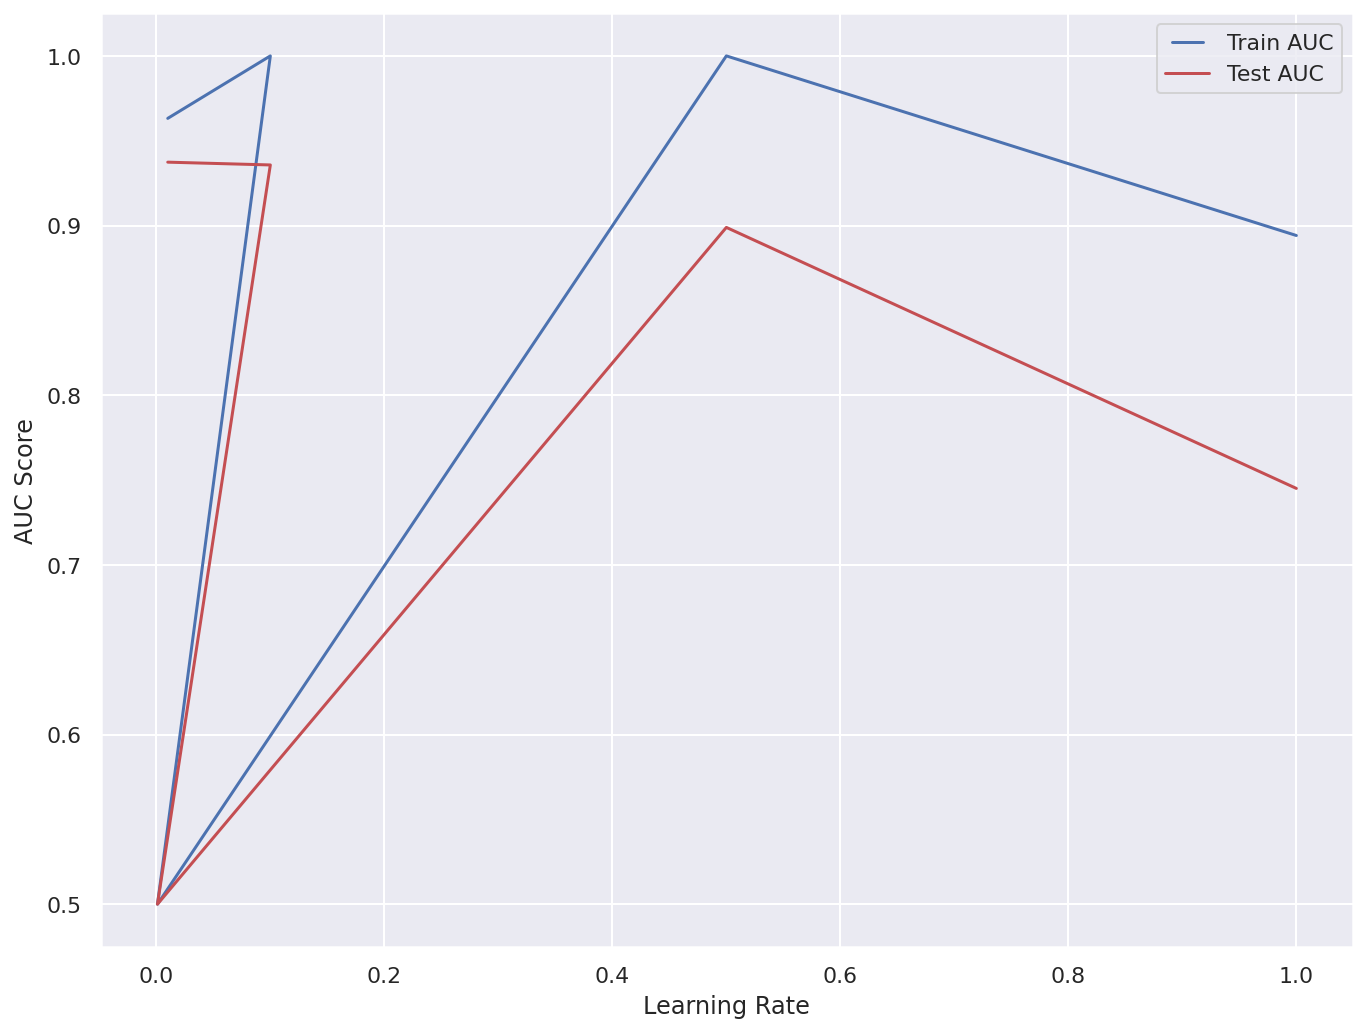

In [ ]:
#this will identify the best learning rate

learning_rates = [ 0.01,0.1,0.001,0.5,1]
train_results = []
test_results = []

for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('Learning Rate')
plt.show()

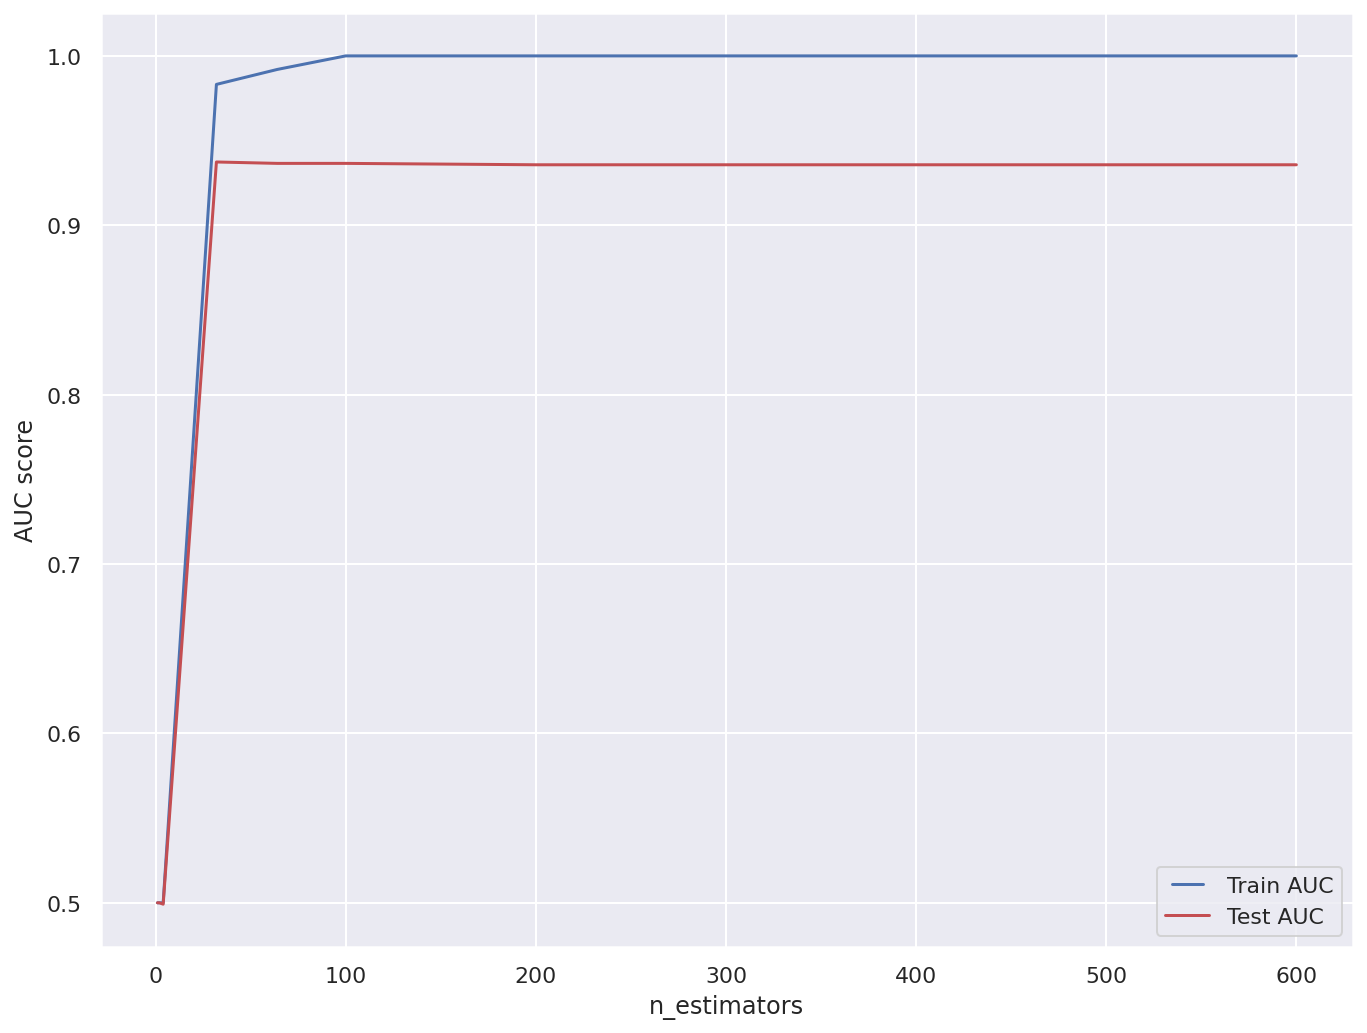

In [ ]:
#finding the optimal number of learning trees

n_estimators = [1, 2, 4,32,64,100,200,600]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


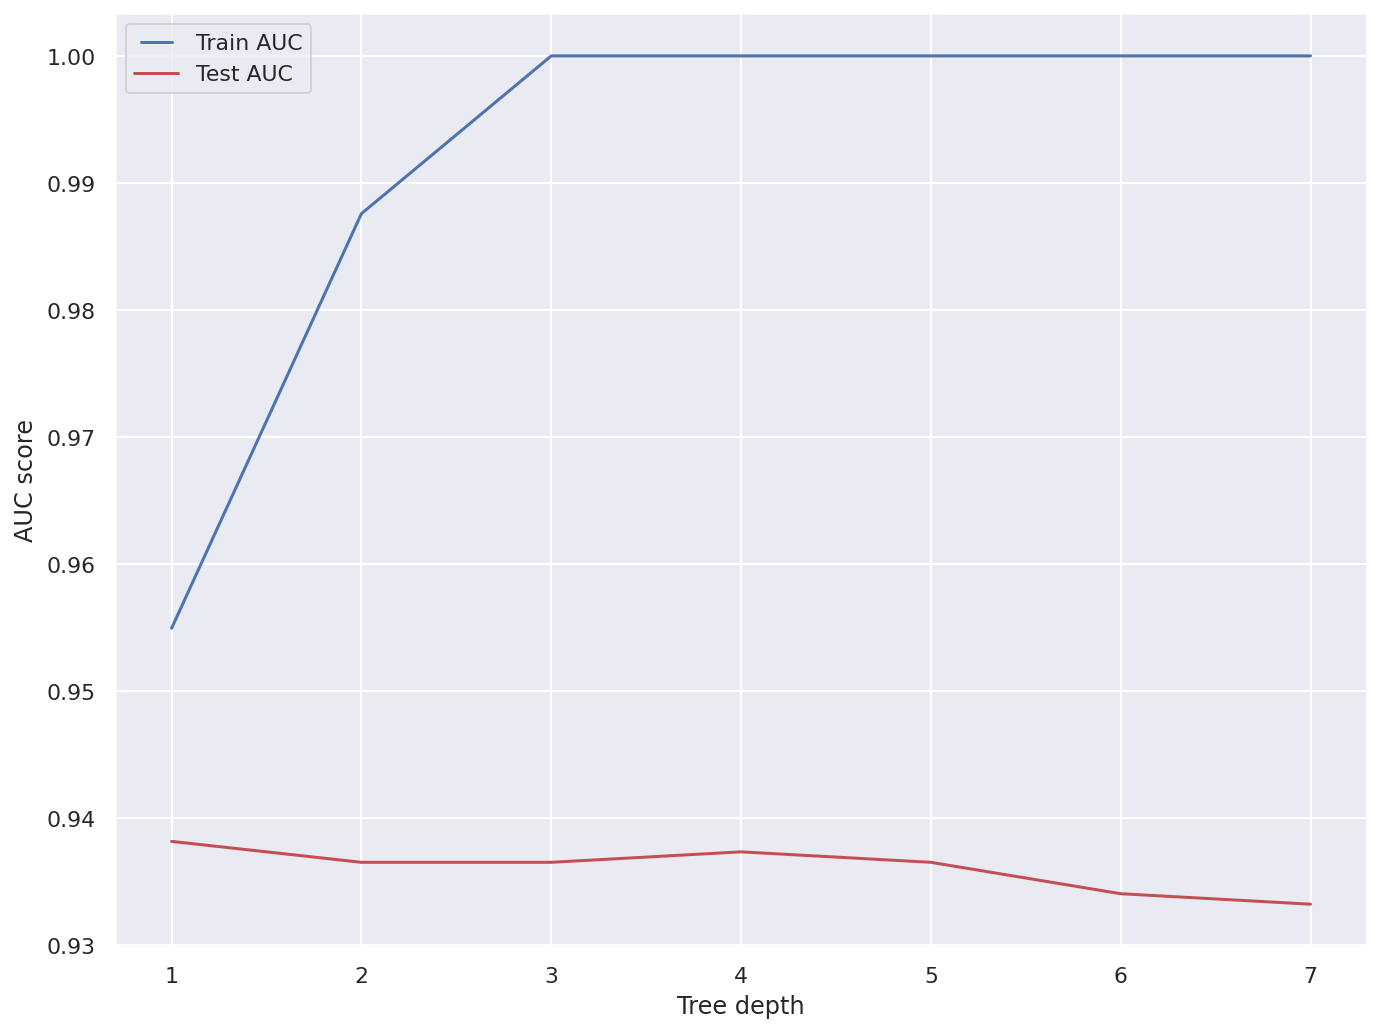

In [ ]:
# finding the maximum depth
max_depths = [1, 2, 3,4,5,6,7]
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We find that the optimal learning rate is around 0.09, the optimal number of learning trees to be 48 and maximum depth 3. We apply this to the model and update the Result table. 

In [ ]:
Gbr = GradientBoostingClassifier(n_estimators=48, learning_rate=0.09, max_depth=3)

Gbr.fit(X_train, y_train)
y_pred_optgbr = Gbr.predict(X_test)

model_results('GBR Optimized',y_test,y_pred_optgbr)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.000000        0.000000         0  0.000000   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.000000  0.000000    0   0   0   0       NaN  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

## f) SVM with RBF


In [ ]:
X_svm = Dataset.drop('status', axis=1).values
y_svm = Dataset['status'].values

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
Svc_model = SVC(kernel ='rbf')

Svc_model.fit(X_train,y_train)

y_pred_svm = Svc_model.predict(X_test)

model_results('SVM RBF',y_test, y_pred_svm)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.278038        0.971564         0  0.971564   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.968906  0.168630  601  14  12   6  0.969779  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

In [ ]:
#we shall try hyperparameter tuning to see if this changes the results starting will searching for an optimal gamma

gamma_range=[0.0001,0.001,0.01,0.1,1]

acc_score=[]

for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9509881422924901, 0.965612648221344, 0.982213438735178, 0.9782608695652174, 0.9624505928853754]


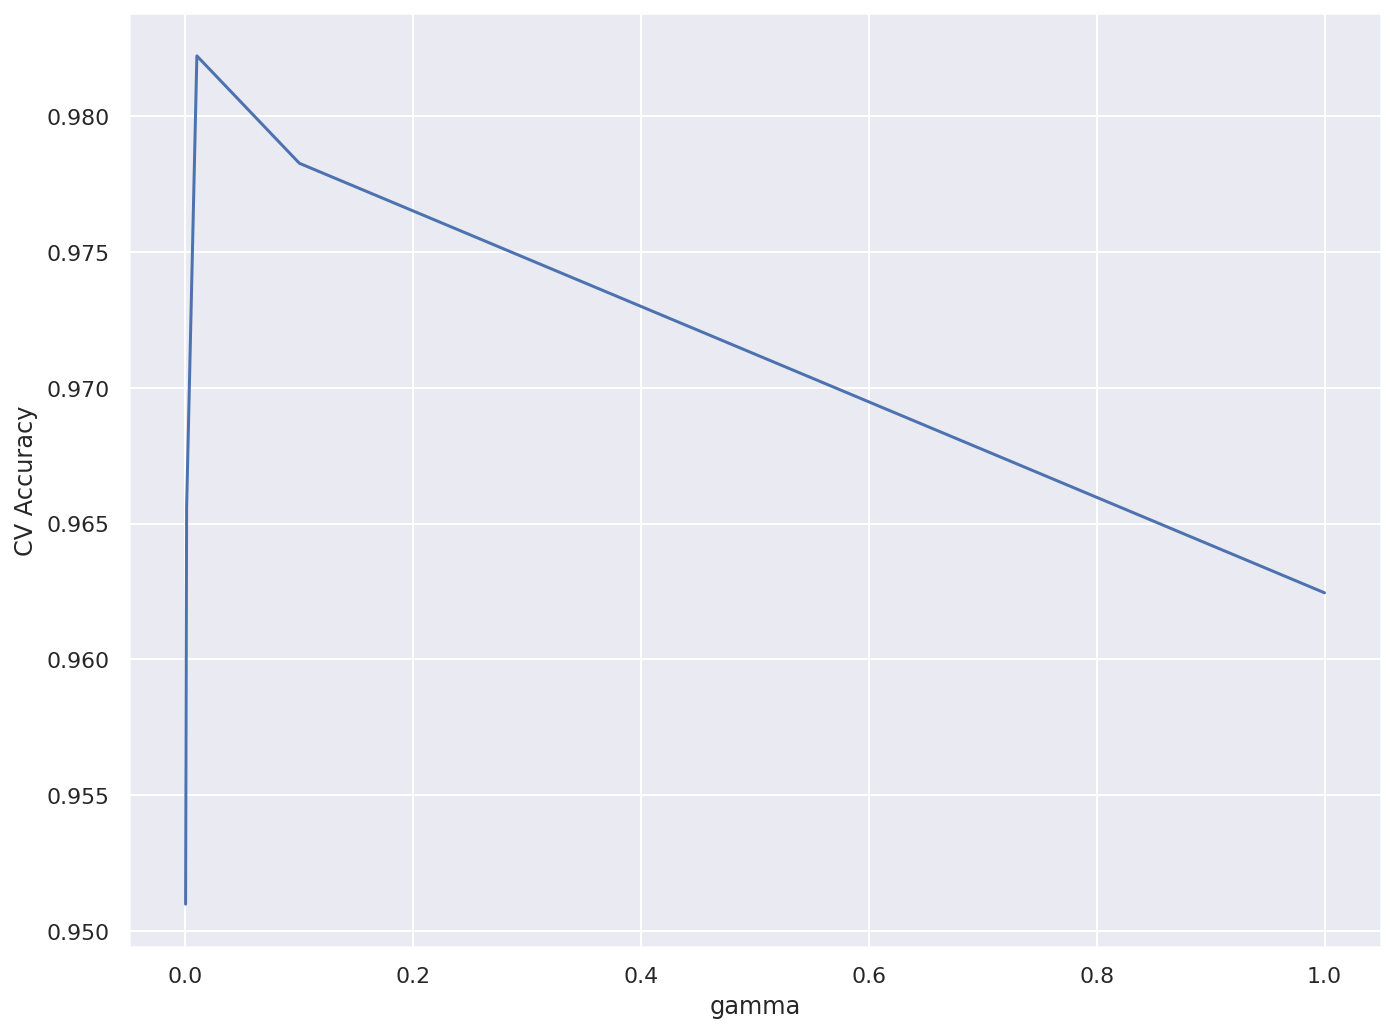

In [ ]:
# Plot the value of gamma (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=gamma_range, y=acc_score)
plt.xlabel('gamma')
plt.ylabel('CV Accuracy')
plt.show()

In [ ]:
#Parameter List for C
C_range=list(range(1,10))
acc_score=[]

#Loop through the C range above
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9802371541501976, 0.982608695652174, 0.9845849802371541, 0.9837944664031619, 0.983399209486166, 0.98300395256917, 0.9822134387351777, 0.9826086956521738, 0.98300395256917]


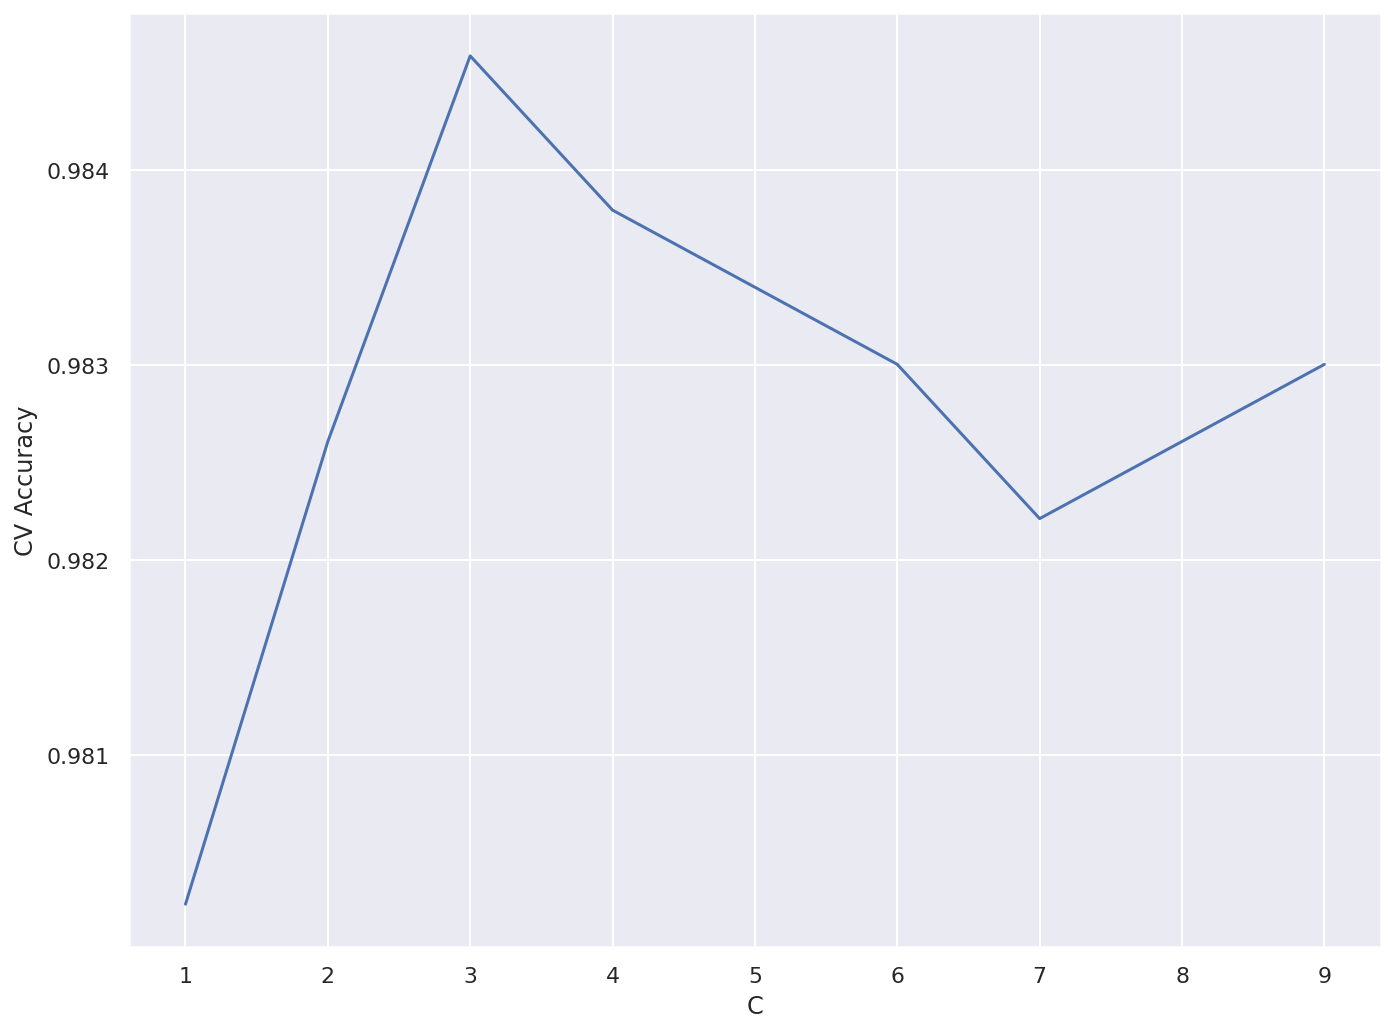

In [ ]:
ax = sns.lineplot(x=C_range, y=acc_score)
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.show()


We find the best c to be 3 and gamma value 0.01

In [ ]:
Svc_model = SVC(kernel ='rbf', C =3, gamma =0.01)

Svc_model.fit(X_train,y_train)

y_pred_svm1 = Svc_model.predict(X_test)

model_results('SVM RBF',y_test, y_pred_svm1)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.318147        0.973144         0  0.973144   
6           SVM Linear  0.000000        0.000000         0  0.000000   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.971779  0.163879  600  16  10   7  0.972355  
6   0.000000  0.000000    0   0   0   0       NaN  
7   0.000000  0.000000    0   0   0   0       NaN

## g) SVM with Linear

In [ ]:
Svc_model = SVC(kernel = 'linear')

Svc_model.fit(X_train,y_train)

y_pred_svm = Svc_model.predict(X_test)

model_results('SVM Linear',y_test, y_pred_svm)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.318147        0.973144         0  0.973144   
6           SVM Linear  0.358256        0.974724         0  0.974724   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.971779  0.163879  600  16  10   7  0.972355  
6   0.973849  0.158986  600  17   9   7  0.974239  
7   0.000000  0.000000    0   0   0   0       NaN

In [ ]:
#We perform hyperparamter optimisation starting with c

C_range=list(np.arange(0.001,3,0.1))
acc_score=[]

for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9600790513833992, 0.98300395256917, 0.9837944664031619, 0.983399209486166, 0.9837944664031619, 0.9837944664031619, 0.983399209486166, 0.9826086956521738, 0.9826086956521738, 0.98300395256917, 0.983399209486166, 0.9837944664031621, 0.9837944664031621, 0.9837944664031621, 0.9837944664031621, 0.9837944664031621, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.9837944664031621, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166, 0.983399209486166]


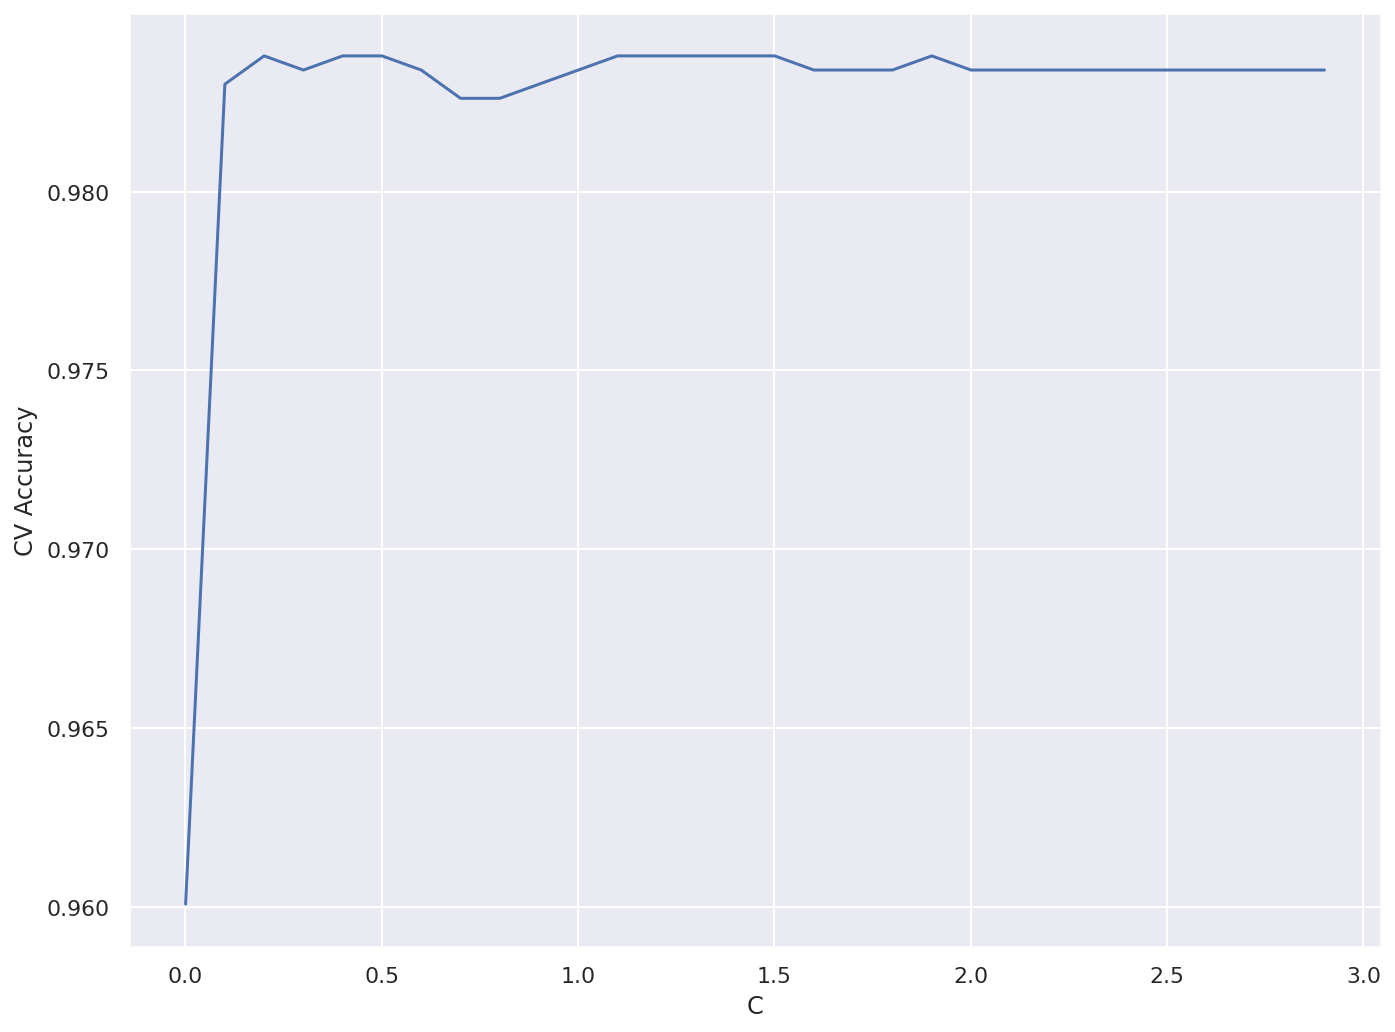

In [ ]:
# Plot the value of C (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=C_range, y=acc_score)
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.show()

We find the optimal score to be 0.8

In [ ]:
Svc_model = SVC(kernel = 'linear',C = 0.2)

Svc_model.fit(X_train,y_train)

y_pred_svm2 = Svc_model.predict(X_test)

model_results('SVM Linear',y_test, y_pred_svm2)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.318147        0.973144         0  0.973144   
6           SVM Linear  0.398365        0.976303         0  0.976303   
7       SVM Polynomial  0.000000        0.000000         0  0.000000   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.971779  0.163879  600  16  10   7  0.972355  
6   0.975137  0.153937  601  17   9   6  0.975607  
7   0.000000  0.000000    0   0   0   0       NaN

## h) SVM with Polynomial

In [ ]:
Svc_model = SVC(kernel = 'poly')

Svc_model.fit(X_train,y_train)

y_pred_svm = Svc_model.predict(X_test)

model_results('SVM Polynomial',y_test, y_pred_svm)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.318147        0.973144         0  0.973144   
6           SVM Linear  0.398365        0.976303         0  0.976303   
7       SVM Polynomial  0.237929        0.969984         0  0.969984   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.971779  0.163879  600  16  10   7  0.972355  
6   0.975137  0.153937  601  17   9   6  0.975607  
7   0.967506  0.173251  600  14  12   7  0.968449

In [ ]:
D_range=list(range(1,10))
acc_score=[]

for d in D_range:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9818181818181818, 0.9766798418972332, 0.9766798418972332, 0.9695652173913045, 0.9699604743083002, 0.9640316205533596, 0.9648221343873518, 0.9620553359683794, 0.9644268774703557]


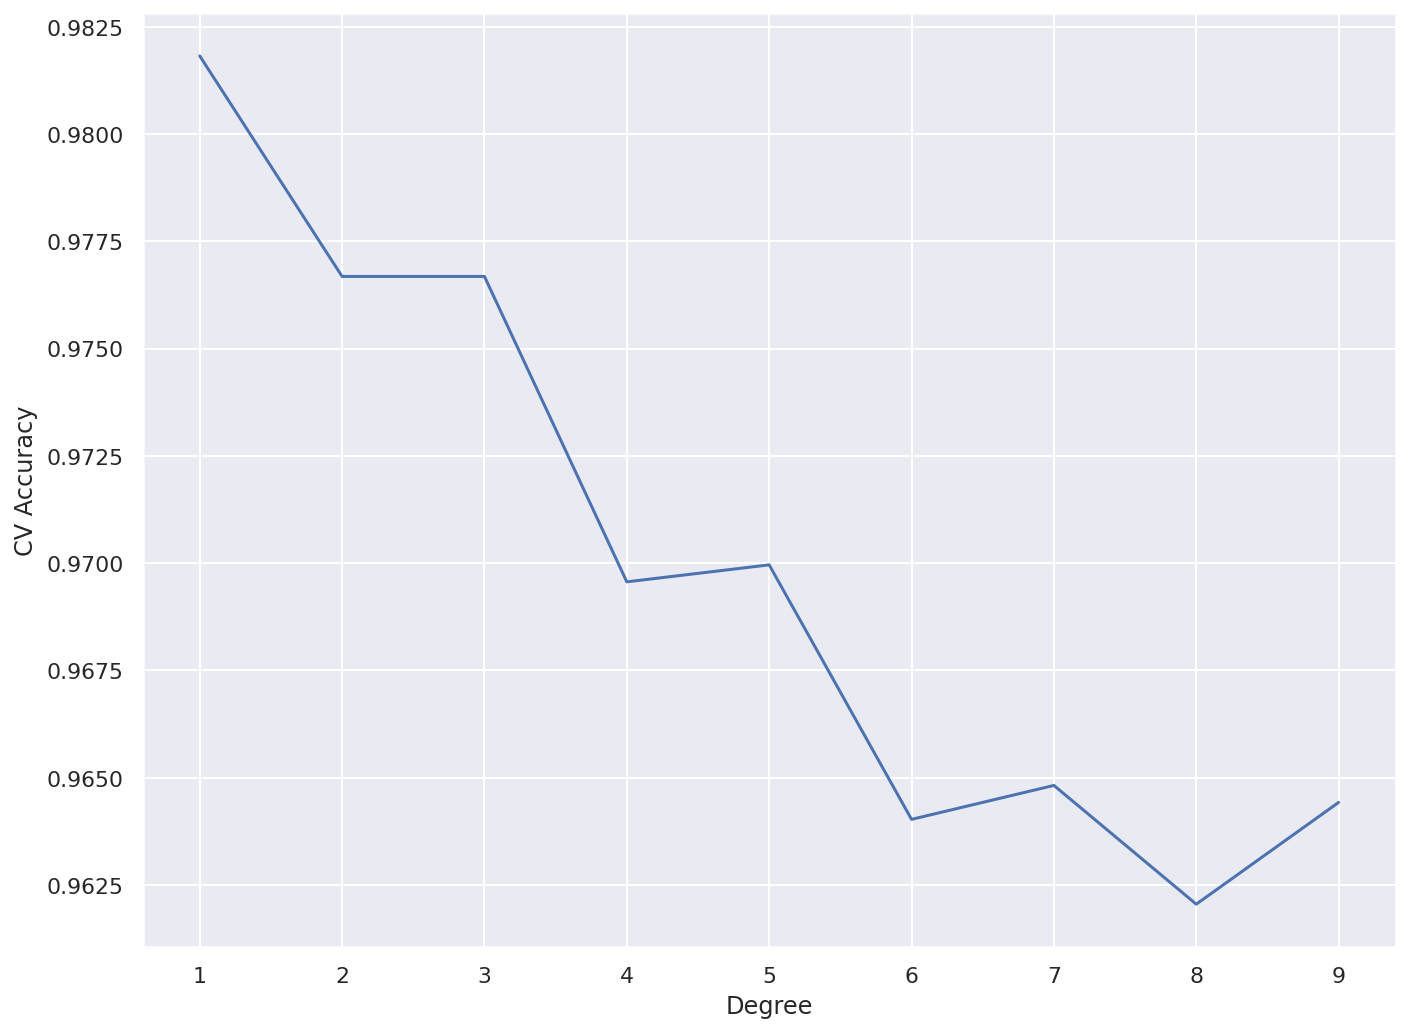

In [ ]:
# Plot the value of degree (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=D_range, y=acc_score)
plt.xlabel('Degree')
plt.ylabel('CV Accuracy')
plt.show()


Accuracy decreases with an increase in degree, so we perform optimisation. 

In [ ]:
C_range=list(np.arange(0.001,3,0.1))
acc_score=[]

for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9517786561264823, 0.9644268774703558, 0.9699604743083003, 0.9727272727272727, 0.9727272727272727, 0.9739130434782608, 0.975098814229249, 0.975098814229249, 0.975098814229249, 0.9754940711462451, 0.9766798418972332, 0.9762845849802371, 0.9766798418972332, 0.9762845849802371, 0.975889328063241, 0.975889328063241, 0.975098814229249, 0.975098814229249, 0.9762845849802371, 0.9774703557312254, 0.9774703557312254, 0.9782608695652174, 0.9778656126482212, 0.9782608695652174, 0.9794466403162057, 0.9794466403162057, 0.9794466403162057, 0.9798418972332016, 0.9802371541501975, 0.9806324110671936]


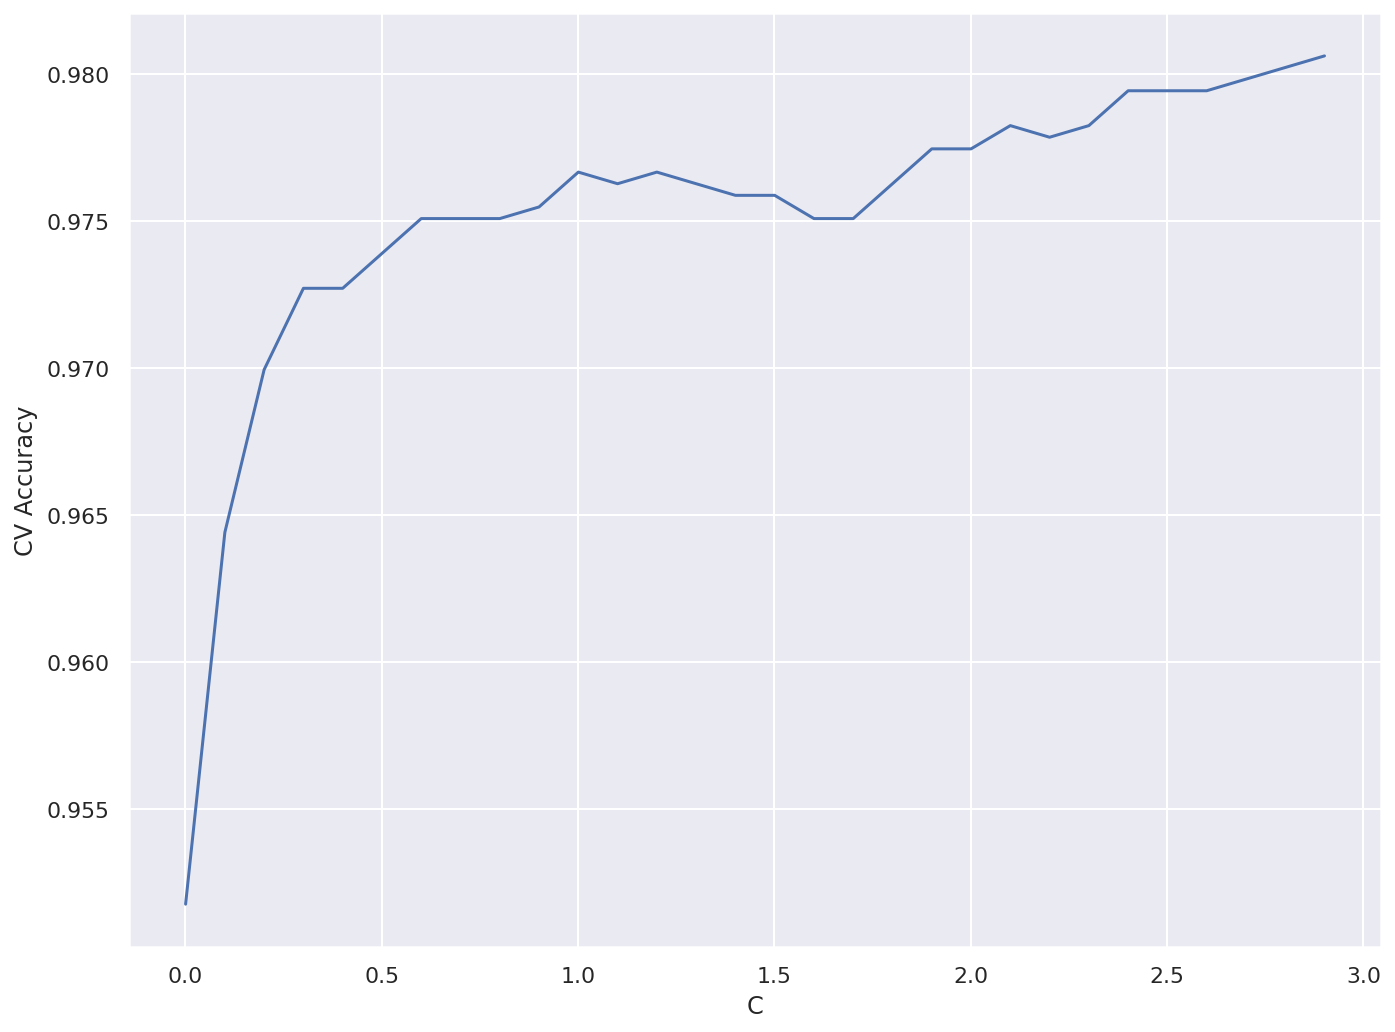

In [ ]:
ax = sns.lineplot(x=C_range, y=acc_score)
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.show()

We find that a score of 2.9 is optimal and apply this in the model. 

In [ ]:
Svc_model = SVC(kernel = 'poly',degree =3, C =2.9)

Svc_model.fit(X_train,y_train)

y_pred_svm = Svc_model.predict(X_test)

model_results('SVM Polynomial',y_test, y_pred_svm)
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.318147        0.973144         0  0.973144   
6           SVM Linear  0.398365        0.976303         0  0.976303   
7       SVM Polynomial  0.518692        0.981043         0  0.981043   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.971779  0.163879  600  16  10   7  0.972355  
6   0.975137  0.153937  601  17   9   6  0.975607  
7   0.980421  0.137686  602  19   7   5  0.980679

Applying the optimisation features slightly increases the perfromances of the SVM RBF and SVM Linear models, while SVM polynomial displayed significant changes in perfromance after optimisation.

# 6. Challenging the Solution

The models applied resulted in relatively good perfromances, we shall utilise other models and examine how the perfromance will vary as a result. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X=Dataset.drop(['status'], axis=1).values
y=Dataset['status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
KNN = KNeighborsClassifier(n_neighbors = 3) 
KNN.fit(X_train, y_train) 
Y_pred = KNN.predict(X_test)  
Acc_knn = round(KNN.score(X_train, y_train) * 100, 2)
Acc_knn

99.1

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred=gaussian.predict(X_test)
Acc_gaussian=round(gaussian.score(X_train, y_train) * 100,2)
Acc_gaussian

28.64

# 7. Evaluation & Conclusion

The models chosen to analyse accuracy in prediction performed fairly well, as displayed by the table below. The best performance was the AdaBoost which had the lowest RMSE score and highest accuracy scores. The SVM polynomial model displayed significant improvements after tuning. However, overall perfromace based on the RMSE score and accuracy scores could be improved, as the desired thershold for the former would have been under 10%. This can be attributed to the high number of outliers in the dataset and perhaps the effect of failing to further study them at an individual level. 

Alternatives to the solution using KNN provided a higher accuracy which points to more overfitting while the gaussian approach was grossly underfitted. 

Data cleaning and preparation may have had an effect on results as well, as a number of null values were dropped while others filled with mean, mode or median values. We can conclude that while the data provided for analysis was satisfactory for preliminary examination, more comprehensive data from other researchers in similar fields would improve results. 


In [ ]:
Results_df

Model        R2  Accuracy Score  F1 Score    Recall  \
0  Logistic Regression  0.398365        0.976303         0  0.976303   
1        Random Forest  0.438474        0.977883         0  0.977883   
2             AdaBoost  0.639019        0.985782         0  0.985782   
3                  GBR  0.558801        0.982622         0  0.982622   
4        GBR Optimized  0.598910        0.984202         0  0.984202   
5              SVM RBF  0.318147        0.973144         0  0.973144   
6           SVM Linear  0.398365        0.976303         0  0.976303   
7       SVM Polynomial  0.518692        0.981043         0  0.981043   

   Precision      RMSE   TP  TN  FP  FN  F1 score  
0   0.975137  0.153937  601  17   9   6  0.975607  
1   0.976142  0.148718  603  16  10   4  0.976495  
2   0.987539  0.119239  600  24   2   7  0.986376  
3   0.984621  0.131824  599  23   3   8  0.983349  
4   0.985645  0.125689  600  23   3   7  0.984740  
5   0.971779  0.163879  600  16  10   7  0.972355  
6   0.975137  0.153937  601  17   9   6  0.975607  
7   0.980421  0.137686  602  19   7   5  0.980679